<H1> Business Problem </H1>

<H2> Overview </H2>

In the era of online stores, It’s become essential and mandatory to know the demand of any product in near future. It will help stores to stock the product which demand is going to be high in near future. If we are able to do so, it will directly improve revenue of company.<br>
 i.e.  if we have any event in next week, definitely the sell will increase on some product depends on the event.  


<H2> Objective: </H2>  Our main objective is to predict the product’s sell for the next 28 days.

<H2> Performance Matrix: </H2>   

<b> RMSE (Root Mean Square Error) </b> :  RMSE is a good measure when we care more about prediction. It is a square root of the average squared error.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/05/rmse.png">

RMSE gives more importance to the most significant error. If there is slighlty error in demand our RMSE will increase significantly. <br>






<H2> Why ML approach, and Why not normal Statstical Method </H2>

Statstical method can perfrom good when we have univarite  dataset or one step prediction. It has been seen that for multi step prediction , ML methods works well.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
import shutil

total, used, free = shutil.disk_usage("/")

print("Total: %d GiB" % (total // (2**30)))
print("Used: %d GiB" % (used // (2**30)))
print("Free: %d GiB" % (free // (2**30)))

Total: 58 GiB
Used: 16 GiB
Free: 40 GiB


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/
#Make directory named kaggle and copy kaggle.json file there.

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c m5-forecasting-accuracy

 46%|█████████████████▍                    | 21.0M/45.8M [00:00<00:00, 81.0MB/s]
100%|███████████████████████████████████████| 45.8M/45.8M [00:00<00:00, 172MB/s]


In [15]:
!unzip "m5-forecasting-accuracy.zip"

Archive:  m5-forecasting-accuracy.zip
  inflating: calendar.csv            
  inflating: sales_train_evaluation.csv  
  inflating: sales_train_validation.csv  
  inflating: sample_submission.csv   
  inflating: sell_prices.csv         


# Calendar

In [61]:
# calendar = pd.read_csv('calendar.csv')
calendar.head(5)#checking top 

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0 2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1 2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2 2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3 2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4 2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI event_3  \
0          NaN          NaN          NaN        0        0        0           
1          NaN          NaN          NaN        0        0        0           
2          NaN          NaN          NaN        0        0        0           
3          NaN          NaN          NaN        1        1        0           
4          NaN          NaN          NaN        1        0        1           

  event_type_3  
0               
1               
2               
3               
4

In [17]:
#What is the size of the data  calendar
print(f'Calendar has {calendar.shape[0]} rows and {calendar.shape[1]} columns.')

Calendar has 1969 rows and 14 columns.


In [ ]:
#what are the columns present in calendar
print(calendar.columns)

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')


<H2> Column Description </H2>

<table>
<tr><th>Column Name </th><th> Description</th></tr>
<tr><td>date</td><td> The date in a “y-m-d” format</td>></tr>
<tr><td>wm_yrwk</td><td> The id of the week the date belongs to.</td>></tr>
<tr><td>weekday</td><td> The type of the day (Saturday, Sunday, …, Friday).</td>></tr>
<tr><td>wday</td><td> The id of the weekday, starting from Saturday.</td>></tr>
<tr><td>month</td><td> The month of the date.</td>></tr>
<tr><td>year</td><td> The year of the date.</td>></tr>
<tr><td>d</td><td>no of days count </td>></tr>
<tr><td>event_name_1</td><td> If the date includes an event, the name of this event.</td>></tr>
<tr><td>event_type_1</td><td> If the date includes an event, the type of this event.</td></tr>
<tr><td>event_name_2</td><td> If the date includes a second event, the name of this event.</td></tr>
<tr><td> event_type_2</td><td> If the date includes a second event, the type of this event.</td></tr>
<tr><td> snap_CA snap_TX and snap_WI</td><td> A binary variable (0 or 1) indicating whether the stores of CA,<br>
                         TX or WI allow SNAP3 purchases on the examined date. 1 indicates<br> that SNAP 
    purchases areallowed.</td></tr>
</table>

In [ ]:
#checking types of data
calendar.dtypes

date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object

We have only  two  types of data  in Calendar : int64 and object


int64 :  'wm_yr_wk', 'wday', 'month', 'year',  'snap_CA', 'snap_TX', 'snap_WI'       </p>


object64 : 'date', 'weekday', 'd', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',

In [64]:
#checking null values

def missing_values(df):
    missing_count = df.isnull().sum()
    percent_missing = missing_count * 100 / len(df)
    values_available = len(df) - missing_count

    missing_value_df = pd.DataFrame({
        'column_name': df.columns,
        "non_misisng_count": values_available,
        'missing_count': missing_count,
        
        'percent_missing': percent_missing
    })
    missing_value_df.sort_values('percent_missing', inplace=True)

    return missing_value_df


missing_values(calendar)

column_name  non_misisng_count  missing_count  percent_missing
date                  date               1969              0         0.000000
wm_yr_wk          wm_yr_wk               1969              0         0.000000
weekday            weekday               1969              0         0.000000
wday                  wday               1969              0         0.000000
month                month               1969              0         0.000000
year                  year               1969              0         0.000000
d                        d               1969              0         0.000000
snap_CA            snap_CA               1969              0         0.000000
snap_TX            snap_TX               1969              0         0.000000
snap_WI            snap_WI               1969              0         0.000000
event_3            event_3               1969              0         0.000000
event_type_3  event_type_3               1969              0         0.000000
event_name_1  event_name_1                162           1807        91.772473
event_type_1  event_type_1                162           1807        91.772473
event_name_2  event_name_2                  5           1964        99.746064
event_type_2  event_type_2                  5           1964        99.746064


<b> we have only 4 columns which has missing value in it  </b>                                                                     
  <I> event_name_1  and event_type_1 has 91%  missing    values                                         
  event_name_2 and event_type_2  has 99% missing values    </I>                               
  

In [ ]:
#weekdays 
print(f' weekdays {calendar.weekday.unique()}')

#wday
print(f' wday {calendar.wday.unique()}')

 weekdays ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
 wday [1 2 3 4 5 6 7]


We have 7 days saturady to friday where 1 donates to saturday , 2 donates to sunday and so on.




<a href="https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/133614">What is snap Purchasing</a>



The United States federal government provides a nutrition assistance benefit called the Supplement Nutrition Assistance Program (SNAP). SNAP provides low income families and individuals with an Electronic Benefits Transfer debit card to purchase food products. In many states, the monetary benefits are dispersed to people across 10 days of the month and on each of these days 1/10 of the people will receive the benefit on their card.

ref: https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/133614



In [ ]:
#unique values in snap coloumns  
print(f' California : {calendar.snap_CA.unique()}')
print(f' Texas : {calendar.snap_TX.unique()}')
print(f' Wisconsin : {calendar.snap_WI.unique()}')



 California : [0 1]
 Texas : [0 1]
 Wisconsin : [0 1]


We have two values 0 and 1 for each state in snap columns. Where 1 indicates that snap purcahes is allowed and 0 indicates that purchase is not allowed.





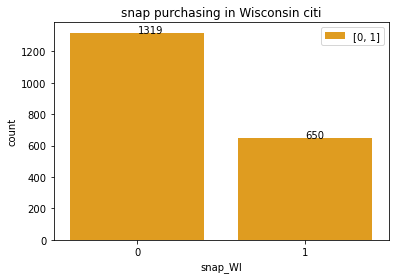

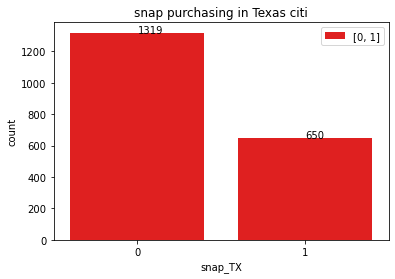

No handles with labels found to put in legend.


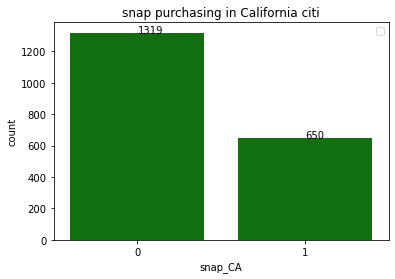

In [ ]:
#Wisconsin Citi 
plots = sns.countplot(calendar.snap_WI, label = [0,1], color = 'orange')

for bar in plots.patches:
    plots.annotate(bar.get_height() ,
                   (bar.get_x()  + bar.get_width() / 2, 
                    bar.get_height()))
plt.legend()
plt.title('snap purchasing in Wisconsin citi')
plt.show()



#Texas Citi
plots = sns.countplot(calendar.snap_TX, label = [0,1], color = 'red')

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x()  +  bar.get_width() / 2, 
                    bar.get_height()))
plt.legend()
plt.title('snap purchasing in Texas citi')
plt.show()


#California
plots = sns.countplot(calendar.snap_CA,  color = 'green')

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.legend()
plt.title('snap purchasing in California citi')
plt.show()


🛒 1316 purchase made without snap and 650 wit snap for all the three CA, TX and WI states,

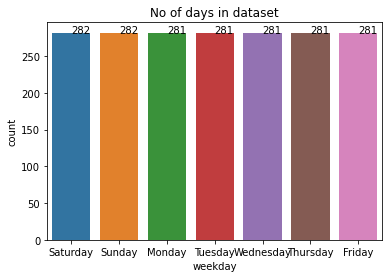

In [ ]:
plots = sns.countplot(calendar.weekday )

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title("No of days in dataset")
plt.show()

* We have balanced date for each day

In [ ]:
print(f' all unique values in  event_name_1 column {calendar.event_name_1.nunique()}')

 all unique values in  event_name_1 column 30


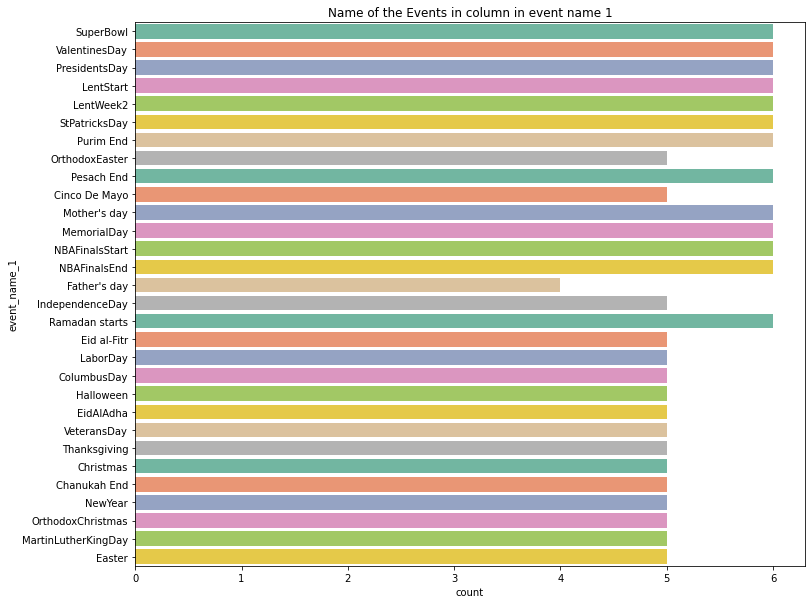

In [ ]:
plt.figure(figsize=(12, 10))
plots = sns.countplot(y=calendar.event_name_1,  palette = "Set2")
plt.title("Name of the Events in column in event name 1")
plt.show()

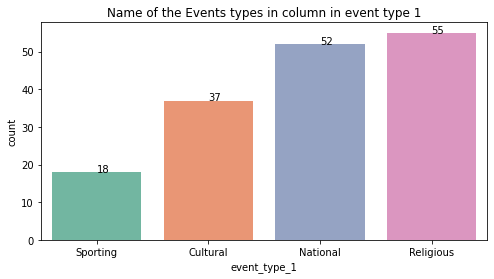

In [ ]:

plt.figure(figsize=(8, 4))
plots = sns.countplot(x=calendar.event_type_1,  palette = "Set2")
for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title("Name of the Events types in column in event type 1")
plt.show()



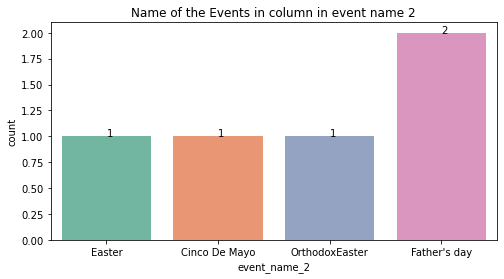

In [ ]:
plt.figure(figsize=(8, 4))
plots = sns.countplot(x=calendar.event_name_2,  palette = "Set2")
for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title("Name of the Events in column in event name 2")
plt.show()

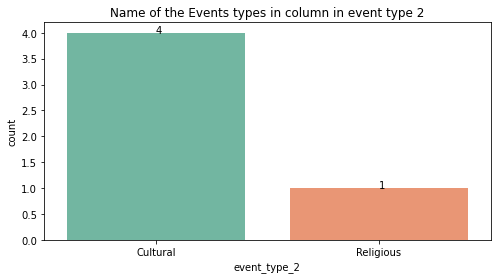

In [ ]:
#
plt.figure(figsize=(8, 4))
plots = sns.countplot(x=calendar.event_type_2,  palette = "Set2")
for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title("Name of the Events types in column in event type 2")
plt.show()




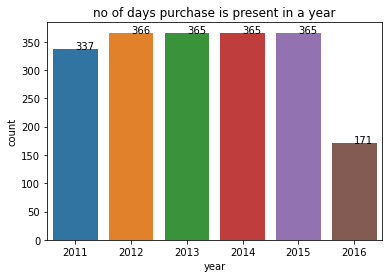

In [ ]:
#no of days purchase is present in a year
plots = sns.countplot(data = calendar, x = 'year' )
for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title("no of days purchase is present in a year")

plt.show()

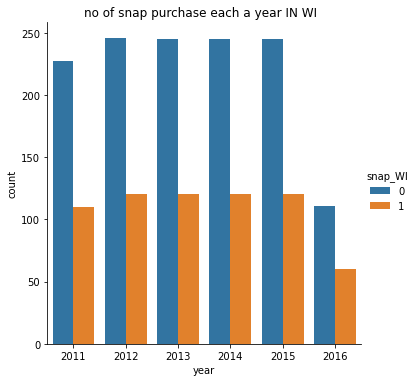

In [ ]:
#no of snap purchase each a year WI
sns.catplot(x='year', data=calendar, kind = 'count', hue = 'snap_WI')
plt.title("no of snap purchase each a year IN WI  ")
plt.show()



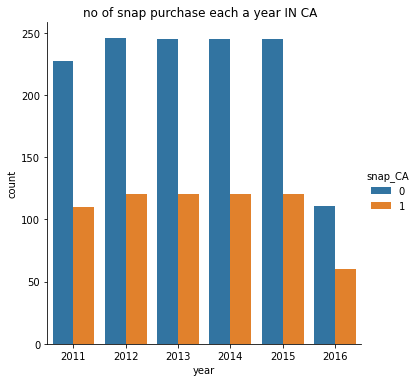

In [ ]:
#no of snap purchase each a year CA
sns.catplot(x='year', data=calendar, kind = 'count', hue = 'snap_CA')
plt.title("no of snap purchase each a year IN CA  ")
plt.show()


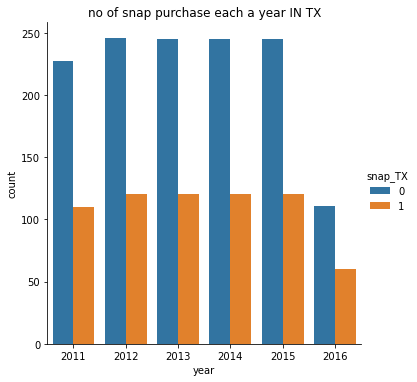

In [ ]:
#no of snap purchase each a year 
sns.catplot(x='year', data=calendar, kind = 'count', hue = 'snap_TX')
plt.title("no of snap purchase each a year IN TX")
plt.show()


### Feature enginerring

In [65]:
#creating two new columns
calendar['event_3'] = calendar[['event_name_1', 'event_name_2']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
calendar['event_type_3'] = calendar[['event_type_1', 'event_type_2']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)


# Sales Train Evaluation

In [18]:
sales_train_eval = pd.read_csv("sales_train_evaluation.csv")
sales_train_eval.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

In [19]:
sales_train_val = pd.read_csv("sales_train_validation.csv")
sales_train_val.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [ ]:
#What is the size of the data  sales_train_eval
print(f'sales_train_eval has {sales_train_eval.shape[0]} rows and {sales_train_eval.shape[1]} columns.')

sales_train_eval has 30490 rows and 1947 columns.


In [ ]:
#column names
sales_train_eval.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

<H2> Column Description </H2>


<table>
<tr><th>Column Name </th><th> Description</th></tr>
<tr><th>item_id</th><th> The id of the product.</th></tr>
<tr><th>dept_id</th><th> The id of the department the product belongs to.</th></tr>
<tr><th>cat_id</th><th>The id of the category the product belongs to.</th></tr>
<tr><th>store_id</th><th> The id of the store where the product is sold.</th></tr>
<tr><th>state_id</th><th>The State where the store is located.</th></tr>
<tr><th>d_1, d_2, …, d_i, … d_1941</th><th> The number of units sold at day i, starting from 2011-01-29.</th></tr>

</table>

In [ ]:
#checking null values
sales_train_eval.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1937      False
d_1938      False
d_1939      False
d_1940      False
d_1941      False
Length: 1947, dtype: bool

In [ ]:
#checking null values
missing_values(sales_train_eval)

column_name  non_misisng_count  missing_count  percent_missing
id              id              30490              0              0.0
d_1300      d_1300              30490              0              0.0
d_1299      d_1299              30490              0              0.0
d_1298      d_1298              30490              0              0.0
d_1297      d_1297              30490              0              0.0
...            ...                ...            ...              ...
d_637        d_637              30490              0              0.0
d_636        d_636              30490              0              0.0
d_635        d_635              30490              0              0.0
d_663        d_663              30490              0              0.0
d_1941      d_1941              30490              0              0.0

[1947 rows x 4 columns]

We don't have any null values in any column

In [ ]:
#types of columns 
sales_train_eval.dtypes

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1937       int64
d_1938       int64
d_1939       int64
d_1940       int64
d_1941       int64
Length: 1947, dtype: object

In [ ]:
#no of unique itemid
print(f'no of unique item: { sales_train_eval.item_id.nunique()}')

no of unique item: 3049


no of unique department: 7


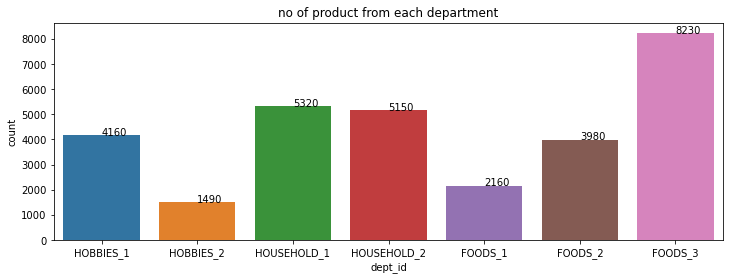

In [ ]:
#no of unique department:
print(f'no of unique department: { sales_train_eval.dept_id.nunique()}')
plt.figure(figsize=(12, 4))
plots = sns.countplot(x=sales_train_eval.dept_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title('no of product from each department')
plt.show()

 no of unique values in category : 3


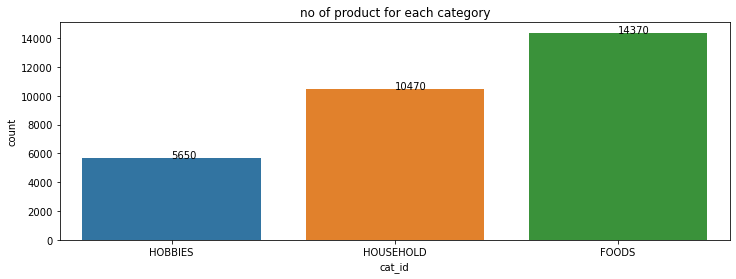

In [ ]:
print(f' no of unique values in category : {sales_train_eval.cat_id.nunique()}')

plt.figure(figsize=(12, 4))
plots = sns.countplot(x=sales_train_eval.cat_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title('no of product for each category')
plt.show()

 no of unique state : 3


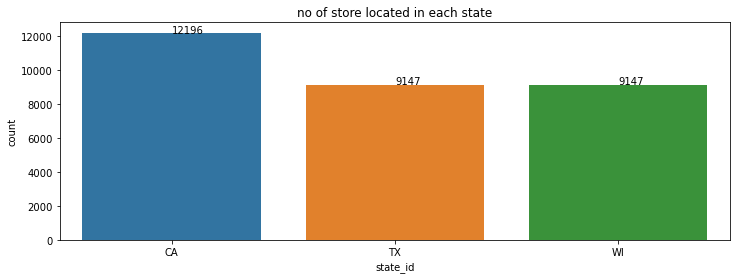

In [ ]:
print(f' no of unique state : {sales_train_eval.state_id.nunique()}')

plt.figure(figsize=(12, 4))
plots = sns.countplot(x=sales_train_eval.state_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))

plt.title('no of store located in each state')
plt.show()

CA has 12196 , TX has 9147 ad WI has 9147 store. 

 no of unique store : 10


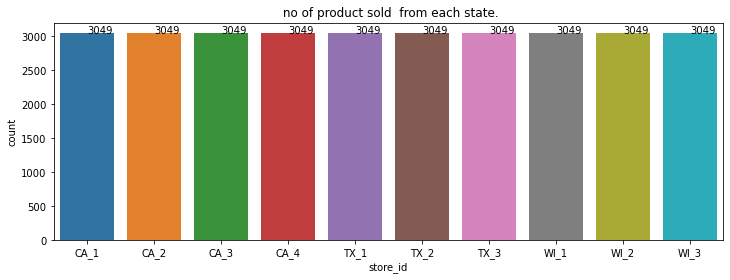

In [ ]:
print(f' no of unique store : {sales_train_eval.store_id.nunique()}')

plt.figure(figsize=(12, 4))
plots = sns.countplot(x=sales_train_eval.store_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))

plt.title(' no of product sold  from each state.')
plt.show()

We have 3049*3  = 9147  products sold from every state 

# Sell Price

In [20]:
sell_price = pd.read_csv("sell_prices.csv")
sell_price.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [ ]:
#What is the size of the data  sell_price
print(f'sell_price has {sell_price.shape[0]} rows and {sell_price.shape[1]} columns.')

sell_price has 6841121 rows and 4 columns.


<H2>  Description Column </H2>

<table>
<tr><th>Column Name </th><th> Description</th></tr>
<tr><th>store_id</th><th> The id of the store where the product is sold.</th></tr>
<tr><th>item_id</th><th> The id of the product.</th></tr>
<tr><th>wm_yr_wk</th><th> The id of the week.</th></tr>
<tr><th>sell_price</th><th> The price of the product for the given week/store. The price is provided per week<br>
(average across seven days). If not available, this means that the product was not sold during the<br>
examined week. Note that although prices are constant at weekly basis, they may change through<br>
time (both training and test set).</th></tr>
    </table>


In [ ]:
# What is the type of each column
sell_price.dtypes

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object

In [ ]:
#checking null values
missing_values(sell_price)

column_name  non_misisng_count  missing_count  percent_missing
store_id      store_id            6841121              0              0.0
item_id        item_id            6841121              0              0.0
wm_yr_wk      wm_yr_wk            6841121              0              0.0
sell_price  sell_price            6841121              0              0.0

 no of unique store : 10


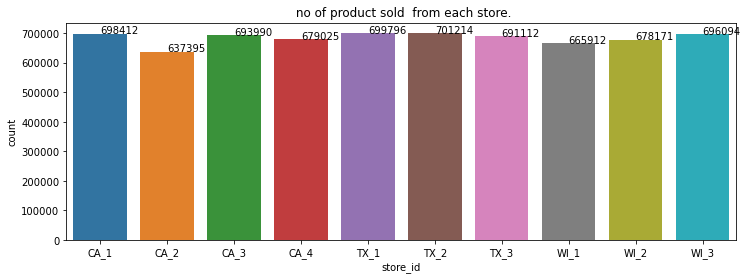

In [ ]:
#no of unique each store in store_id
print(f' no of unique store : {sell_price.store_id.nunique()}')

plt.figure(figsize=(12, 4))
plots = sns.countplot(x=sell_price.store_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title(' no of product sold  from each store.')
plt.show()

In [ ]:
#no of unique item in item_id
print(f' no of unique item: {sell_price.item_id.nunique()}')

 no of unique item: 3049


In [ ]:
#sell price 
sell_price.sell_price.describe().apply(lambda x: format(x, 'f')) # lambda function is used here to avoid scintific notation

count    6841121.000000
mean           4.410952
std            3.408814
min            0.010000
25%            2.180000
50%            3.470000
75%            5.840000
max          107.320000
Name: sell_price, dtype: object

we have minimum value 0.010 and maximum 107.32

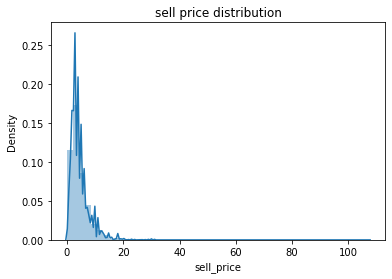

In [ ]:
sns.distplot(sell_price.sell_price)
plt.title("sell price distribution")
plt.show()

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =sell_price.sell_price.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 1.24
20 percentile value is 1.97
30 percentile value is 2.48
40 percentile value is 2.88
50 percentile value is 3.47
60 percentile value is 3.98
70 percentile value is 4.98
80 percentile value is 6.27
90 percentile value is 8.64
100 percentile value is  107.32


In [ ]:
#looking into 90-100th percentile
for i in range(90, 100, 1):
    var =sell_price.sell_price.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 8.64
91 percentile value is 8.97
92 percentile value is 9.47
93 percentile value is 9.92
94 percentile value is 9.98
95 percentile value is 10.98
96 percentile value is 11.88
97 percentile value is 12.87
98 percentile value is 14.48
99 percentile value is 17.92
100 percentile value is  107.32


We have a outlier at 100th percentile, so we can remove it 

# Merge all the data 

→ first down cast all the dataframe to reduce the size of our data.<br>
→ melt the sell_train eval.<br>
→ merge the all 3 dataframe sell price, sell train eval and calendar.<br>



<H4> What is melting </H4>

<b> Melting</b> : It is used to change the DataFrame format from wide to long.  
<img src='https://miro.medium.com/max/875/0*O3SGf68-vlON_H8L.png' alt='melt' width="800" height="600">


<H4> Why melting is required here?</H4>
In our case, there is no unique column which can used to merge sell train eval with sell price and caledar. So here, we will change all columns  d_1 to d_1941 to row which will be treat as one column. This will give us a unique column


In [2]:
#https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling/notebook#highlight%20hl-lexer_wrapper

from tqdm import tqdm


def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i, t in tqdm(enumerate(types)):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(
                    np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(
                    np.int16).min and df[cols[i]].max() < np.iinfo(
                        np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(
                    np.int32).min and df[cols[i]].max() < np.iinfo(
                        np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(
                    np.float16).min and df[cols[i]].max() < np.finfo(
                        np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(
                    np.float32).min and df[cols[i]].max() < np.finfo(
                        np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df


# sales_train_eval = downcast(sales_train_eval)
# sell_price = downcast(sell_price)
# calendar = downcast(calendar)


In [67]:
df = pd.melt(
    sales_train_eval,
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='demand').dropna()
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df,
              sell_price,
              on=['store_id', 'item_id', 'wm_yr_wk'],
              how='left')
# df.to_csv("final_validation.csv",  index = False) #save the data
# df.to_pickle("final_pickle.pkl")
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  demand       date  wm_yr_wk  ... event_name_1  event_type_1  \
0       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
1       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
2       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
3       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
4       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   

   event_name_2  event_type_2 snap_CA snap_TX snap_WI event_3  event_type_3  \
0           NaN           NaN       0       0       0                         
1           NaN           NaN       0       0       0                         
2           NaN           NaN       0       0       0                         
3           NaN           NaN       0       0       0                         
4           NaN           NaN       0       0       0                         

   sell_price  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

* we are creating two new columns , Demand and D with melting the data.
* D column contains data of days from d1 to d1941.
* Demand contains number of product sell on that day.

* So total 30490*1941 = 59,181,090 rows will there in our dataset.

In [4]:
import pickle
df = pd.read_pickle("final_pickle.pkl")
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  demand       date  wm_yr_wk  ... event_name_1  event_type_1  \
0       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
1       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
2       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
3       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   
4       CA  d_1       0 2011-01-29     11101  ...          NaN           NaN   

   event_name_2  event_type_2 snap_CA snap_TX snap_WI event_3  event_type_3  \
0           NaN           NaN       0       0       0     NaN           NaN   
1           NaN           NaN       0       0       0     NaN           NaN   
2           NaN           NaN       0       0       0     NaN           NaN   
3           NaN           NaN       0       0       0     NaN           NaN   
4           NaN           NaN       0       0       0     NaN           NaN   

   sell_price  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

In [6]:
#What is the size of the data  final data
print(f'final file has {df.shape[0]} rows and {df.shape[1]} columns.')

final file has 59181090 rows and 24 columns.


In [69]:
missing_values(df)

column_name  non_misisng_count  missing_count  percent_missing
id                      id           58327370              0         0.000000
event_3            event_3           58327370              0         0.000000
snap_WI            snap_WI           58327370              0         0.000000
snap_TX            snap_TX           58327370              0         0.000000
snap_CA            snap_CA           58327370              0         0.000000
year                  year           58327370              0         0.000000
month                month           58327370              0         0.000000
event_type_3  event_type_3           58327370              0         0.000000
weekday            weekday           58327370              0         0.000000
wday                  wday           58327370              0         0.000000
date                  date           58327370              0         0.000000
demand              demand           58327370              0         0.000000
d                        d           58327370              0         0.000000
state_id          state_id           58327370              0         0.000000
store_id          store_id           58327370              0         0.000000
cat_id              cat_id           58327370              0         0.000000
dept_id            dept_id           58327370              0         0.000000
item_id            item_id           58327370              0         0.000000
wm_yr_wk          wm_yr_wk           58327370              0         0.000000
sell_price      sell_price           46027957       12299413        21.086864
event_name_1  event_name_1            4695460       53631910        91.949817
event_type_1  event_type_1            4695460       53631910        91.949817
event_name_2  event_name_2             121960       58205410        99.790904
event_type_2  event_type_2             121960       58205410        99.790904

* <b> sell price</b> has 20% missing values
* <b> event name  1  and event type 1 has </b> has 91.85%  missing values
*  <b> event name  2  and event type 2 has </b> has 99.79%  missing values

In [5]:
#filling null values in event_3 and event_type_3
df["event_3"] = df['event_3'].cat.add_categories("no_event")
df["event_3"] = df['event_3'].fillna("no_event")
df["event_type_3"] = df['event_type_3'].cat.add_categories("no_event")
df["event_type_3"] = df['event_type_3'].fillna("no_event")

#drop the values
df = df.drop(["event_name_1", "event_name_2", "event_type_2" , "event_type_1"], axis=1)

In [ ]:
#demand column
df.demand.describe().apply(lambda x: format(x, 'f')) 

count    59181090.000000
mean            1.130888
std             3.870038
min             0.000000
25%             0.000000
50%             0.000000
75%             1.000000
max           763.000000
Name: demand, dtype: object

<b> Demand </b> has minimum value 0 which means no sell and maximum 763 sell.

In [ ]:
#checking demand values 
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df.demand.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 1
80 percentile value is 1
90 percentile value is 3
100 percentile value is  763


<b> Demand </b> has 1 value till 90 % and at 100% it has 763 values

In [ ]:

#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90, 100):
    var =df.demand.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 3
91 percentile value is 3
92 percentile value is 4
93 percentile value is 4
94 percentile value is 5
95 percentile value is 5
96 percentile value is 6
97 percentile value is 8
98 percentile value is 10
99 percentile value is 15
100 percentile value is  763


<b> Demand </b> has 15 value till 99 % and at 100% it has 763 values

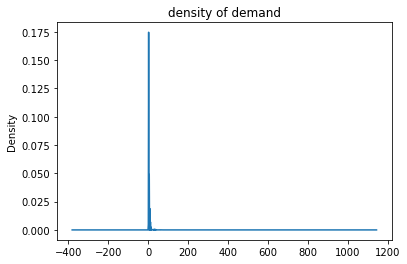

In [ ]:
df['demand'].plot(kind='density')
plt.title("density of demand")
plt.show()

Density plot of demand is cleary showing we have sudden spike in sell between 0 to 15

In [3]:
#sell price column
df.sell_price.describe().apply(lambda x: format(x, 'f')) 

count    46881677.000000
mean            4.409435
std             3.406079
min             0.010000
25%             2.180000
50%             3.470000
75%             5.840000
max           107.300000
Name: sell_price, dtype: object

price has minimum value 0.010 and max is 107.312.

In [ ]:
#checking sell values 
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df.sell_price.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.01000213623046875
10 percentile value is 1.5
20 percentile value is 2.1796875
30 percentile value is 2.8203125
40 percentile value is 3.48046875
50 percentile value is 4.46875
60 percentile value is 5.94140625
70 percentile value is 7.98046875
80 percentile value is nan
90 percentile value is nan
100 percentile value is  nan


Price has 7.98 at 70 % and after that it's nan

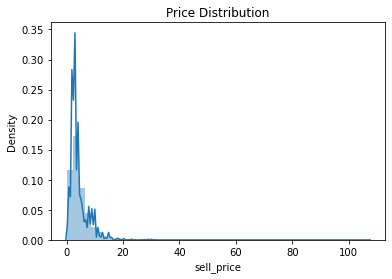

In [4]:
sns.distplot(df.sell_price)
plt.title("Price Distribution")
plt.show()

In [ ]:
#how many values are there with more than x in sell_price
print("values more than 18 :" , (df[df.sell_price>18]).shape)
 
print("values more than 40 :" , (df[df.sell_price>40]).shape)

print("values more than 50 :" , (df[df.sell_price>50]).shape)

print("values more than 60 :" , (df[df.sell_price>60]).shape)

print("values more than 70 :" , (df[df.sell_price>70]).shape)

print("values more than 80 :" , (df[df.sell_price>80]).shape)

values more than 18 : (311786, 22)
values more than 40 : (350, 22)
values more than 50 : (119, 22)
values more than 60 : (112, 22)
values more than 70 : (21, 22)
values more than 80 : (21, 22)


we can clearly see, we have very few sells which has more price more than 40

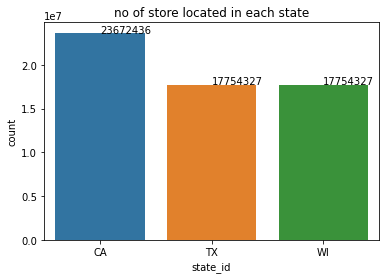

In [ ]:
#how many store located in each state
plots = sns.countplot(x = df.state_id)
for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title('no of store located in each state')
plt.show()

We have 23672436 , 17754327,  17754327 stores data in CA, TX, and WI

 no of unique store : 10


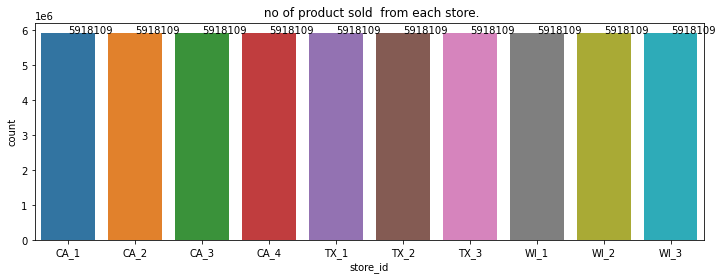

In [ ]:
##no of unique each store in store_id
print(f' no of unique store : {df.store_id.nunique()}')

plt.figure(figsize=(12, 4))
plots = sns.countplot(x=df.store_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title(' no of product sold  from each store.')
plt.show()

We have total 10 store in 3 states in which 4 are in CA, 3 are in TX and 3 are in  WI

 no of unique values in category : 3


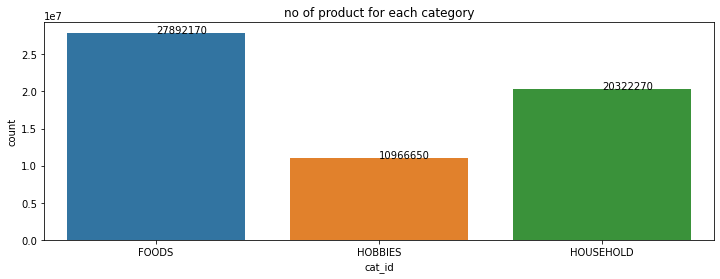

In [ ]:
print(f' no of unique values in category : {df.cat_id.nunique()}')

plt.figure(figsize=(12, 4))
plots = sns.countplot(x=df.cat_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title('no of product for each category')
plt.show()

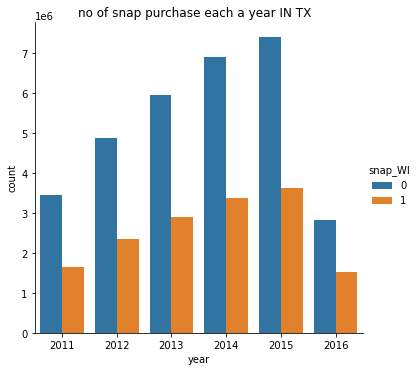

In [ ]:
#no of snap purchase each a year TX
plots = sns.catplot(x='year', data=df, kind = 'count', hue = 'snap_WI')

plt.title("no of snap purchase each a year IN TX  ")

plt.show()


We can see in each year we have very few days when snap was allowed. 


no of unique department: 7


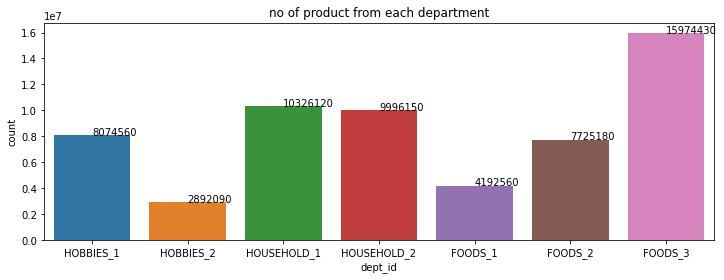

In [ ]:
#no of unique department:
print(f'no of unique department: { df.dept_id.nunique()}')
plt.figure(figsize=(12, 4))
plots = sns.countplot(x=df.dept_id)

for bar in plots.patches:
    plots.annotate(bar.get_height(),  
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()))
plt.title('no of product from each department')
plt.show()

# Univariate Analysis

## Demand With Event_name_1 

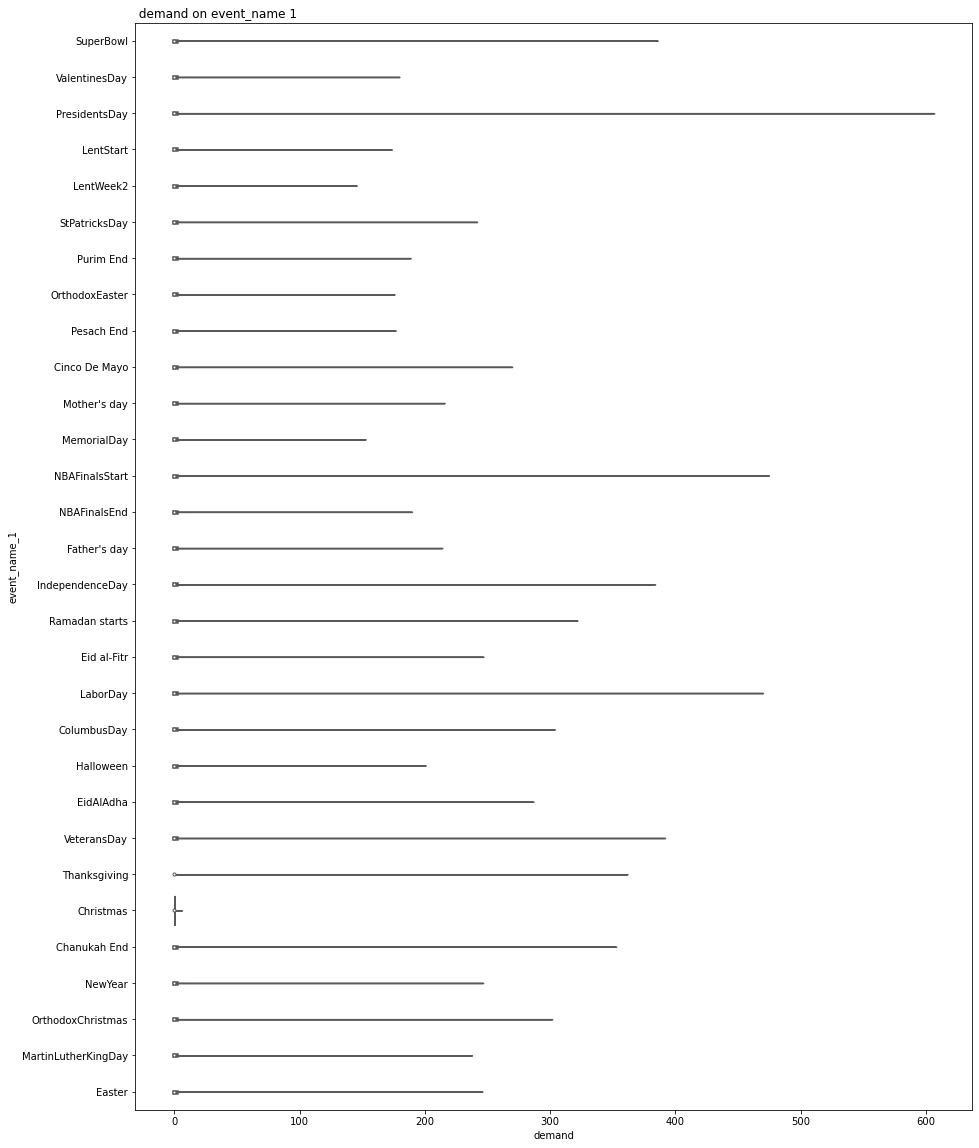

In [31]:
plt.figure(figsize=(15, 20))
sns.violinplot(y = df['event_name_1'], x = df.demand)
plt.title(" demand on event_name 1", loc='left')
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. NBA final start and labour day has more demand as compare to other events.</br>
2. After that Chanuakh end , thanksgiving and Indepndece has more sell.

##  Demand With Event_name_2

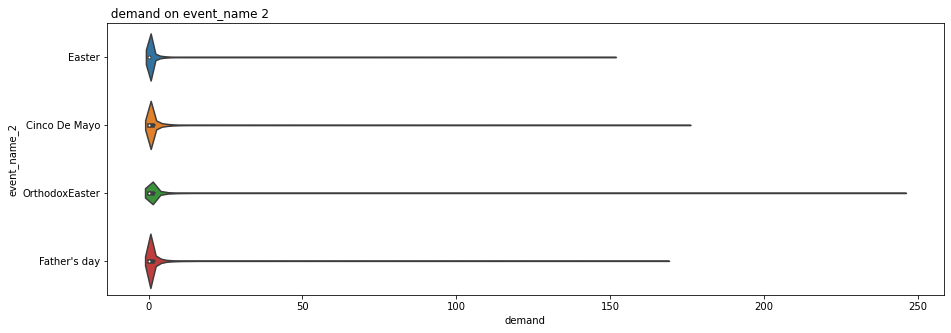

In [54]:
plt.figure(figsize=(15, 5))
sns.violinplot(y = df['event_name_2'], x = df.demand)
plt.title(" demand on event_name 2", loc='left')
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Orthadox event has more demand, after that Father's day, Easter and Cinco De Mayo

 ## Demand With Event_Type_1

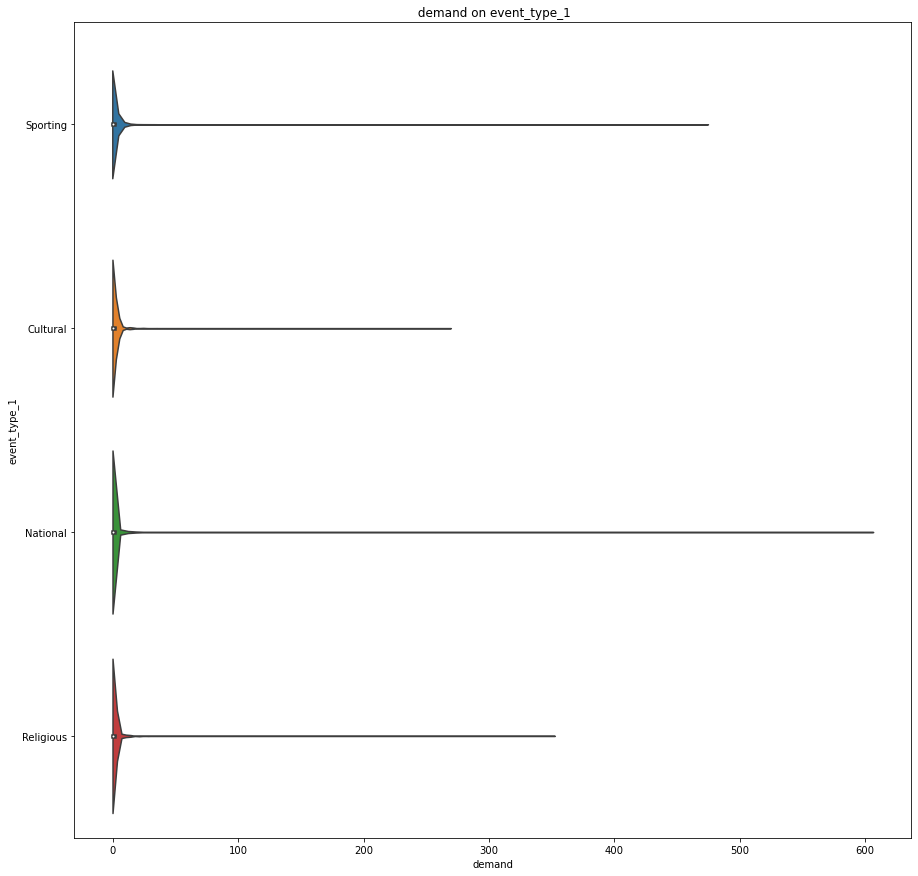

In [51]:
plt.figure(figsize=(15, 15))
sns.violinplot(y = df['event_type_1'], x = df.demand
              )
plt.title(" demand on event_type_1")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. National Event has more sell, then sporting , religious and cultural.

 ## Demand With Event_Type_2

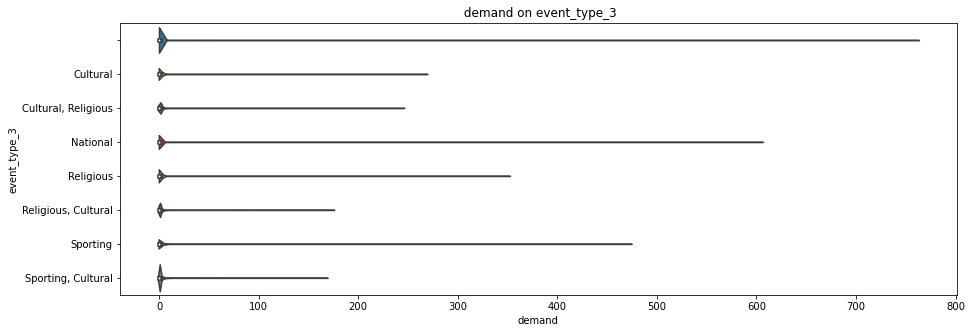

In [70]:

plt.figure(figsize=(15, 5))
sns.violinplot(y = df['event_type_3'], x = df.demand)
plt.title(" demand on event_type_3")
plt.show()

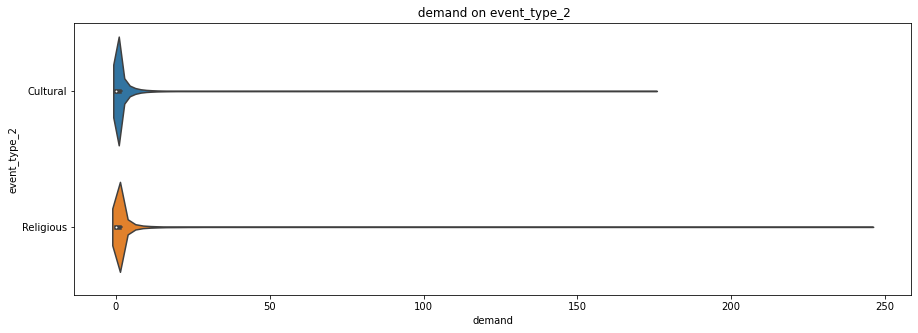

In [50]:

plt.figure(figsize=(15, 5))
sns.violinplot(y = df['event_type_2'], x = df.demand)
plt.title(" demand on event_type_2")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Religious event has more demand as compare to Cultural event.

## Demand per Category

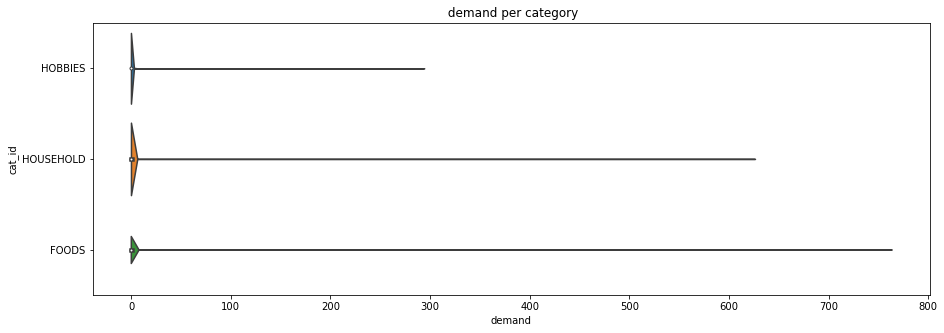

In [52]:
plt.figure(figsize=(15, 5))
sns.violinplot(y = df['cat_id'], x = df.demand)
plt.title(" demand per category")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Foods category has more demand then Householdes , and Hobbies .

## Demand per State

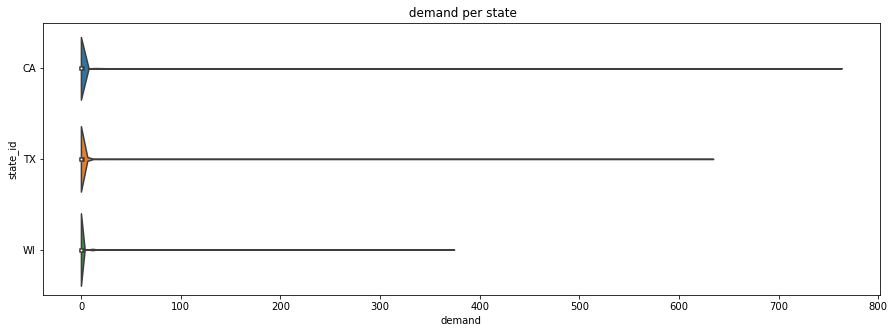

In [53]:
plt.figure(figsize=(15, 5))
sns.violinplot(y = df['state_id'], x = df.demand)
plt.title(" demand per state")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. California  has more demand , then Texas  and Wisconsin.

## Demand Per Year

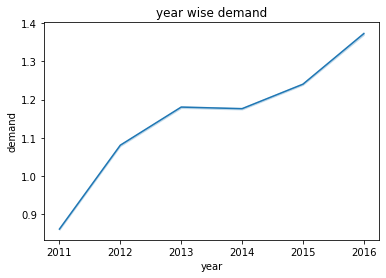

In [35]:
#year wise demand 
sns.lineplot(x=df['year'] , y=df['demand'])
plt.title("year wise demand")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Demand is incresing from 2011 to 2016.
2. Increment is non-linear.
3. There is some low trend from mid 2013 - 2014.

## Demand with Sell Price

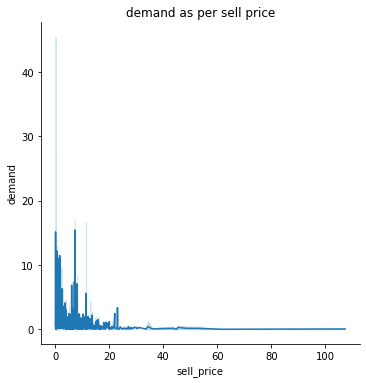

In [41]:
#sell price trend in demand

sns.relplot(
    data=df, x="sell_price", y="demand",  
    kind="line",
)
plt.title("demand as per sell price")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. There is more demand when price is low.
2. When product value is less than 20 \$ it has more demand. </br>
3. As product's price increased more than 20 \$ , demand of the product has decreased significantly.

## Demand when Snap purchased allowed in California

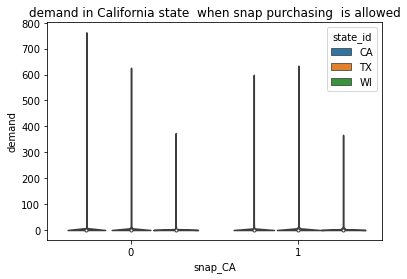

In [55]:
#snap_ca and demand
sns.violinplot(x=df['snap_CA'] , y=df['demand'], hue=df['state_id'])
plt.title("demand in California state  when snap purchasing  is allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. There is no significant impact of demand in Californnia when snap purchasing was allowed


## Demand when Snap purchased allowed in Wisconsin

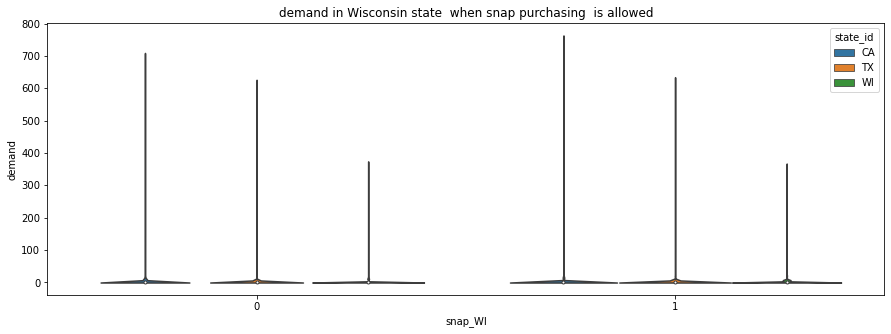

In [56]:
# snap_wi and demand
plt.figure(figsize=(15, 5))
sns.violinplot(x=df['snap_WI'] , y=df['demand'], hue=df['state_id'])
plt.title("demand in Wisconsin state  when snap purchasing  is allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. There is no significant impact of demand in Wisconsin when snap purchasing was allowed


## Demand when Snap purchased allowed in Texas

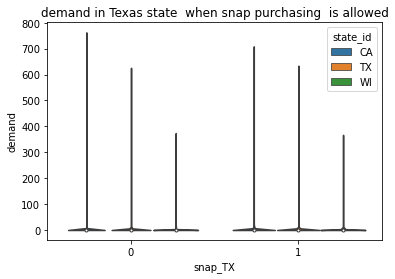

In [57]:
#snap_ta and demand
sns.violinplot(x=df['snap_TX'] , y=df['demand'], hue=df['state_id'])
plt.title("demand in Texas state  when snap purchasing  is allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. There is no significant impact of demand in Texas  when snap purchasing was allowed


## Demand on Weekday

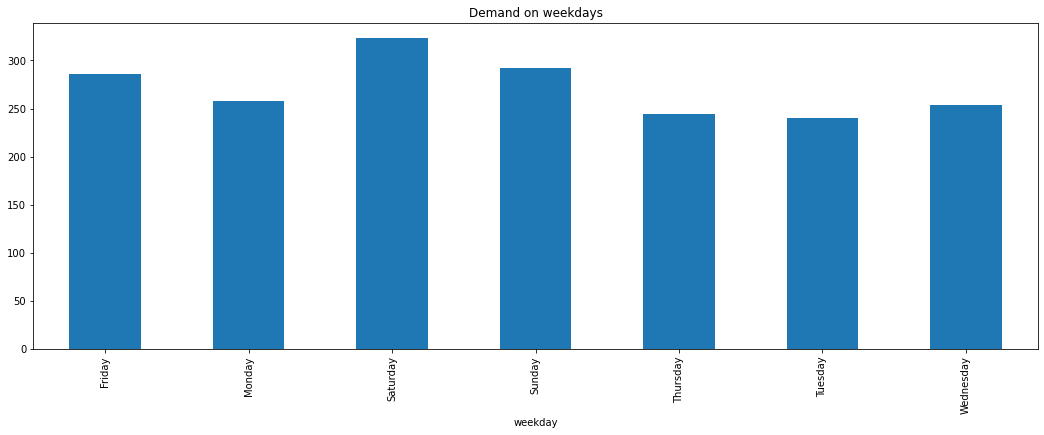

In [191]:
week = df.groupby("weekday")
week["demand"].nunique().plot(kind ="bar", figsize = (18,6))
plt.title("Demand on weekdays")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We have more demand on Saturday and Sunday as compare to other days.


## Demand By each Store

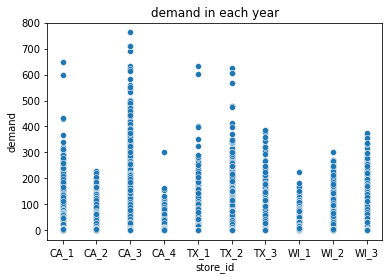

In [ ]:
#demand by each store
sns.violinplot(x = df.store_id, y = df.demand, hue = df.state_id)
plt.title("demand in each year")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Stores which are located in CA and TX has more demand as compare to WI

##  Demand ad Sell price Relationship

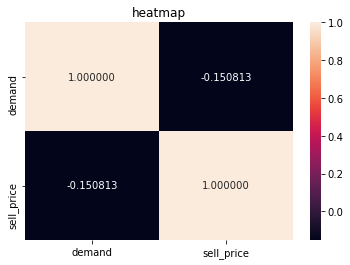

In [ ]:
#sell price and demand co releation p
d = df[['demand', 'sell_price']]
d = d.corr()
sns.heatmap(d, annot = True, fmt = 'f')
plt.title("heatmap")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>           
1.There is negative relationship betweenn demand and sell price. </br>
 
2.We can state that if we have price high then demand will be low , vice versa

# Bivariate Analysis

## Demand with event_name_1 and snap purchasing in Texas

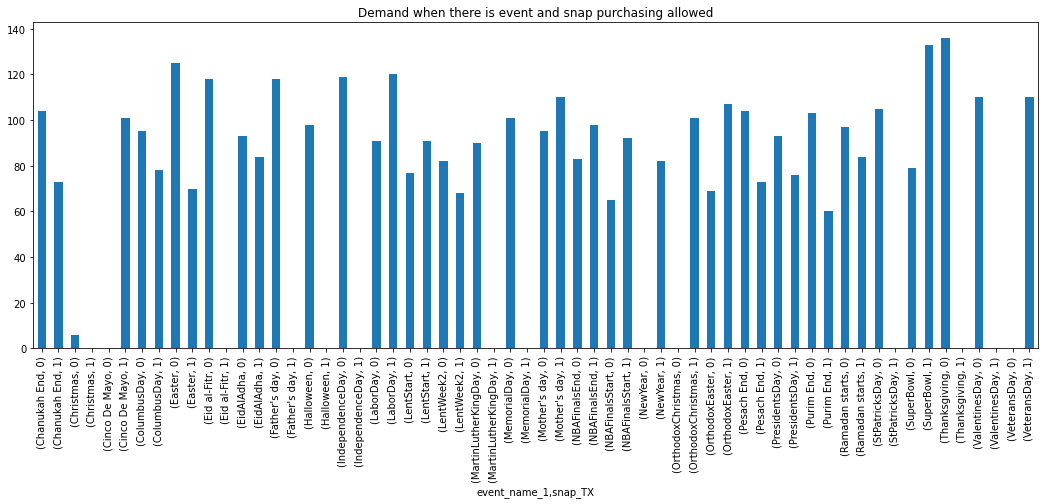

In [148]:
Texas = df.groupby(['event_name_1', "snap_TX"])
Texas["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Labour day and Superbowl, have demand on snap purchasing 


## Demand with event_name_2 and snap purchasing in Texas

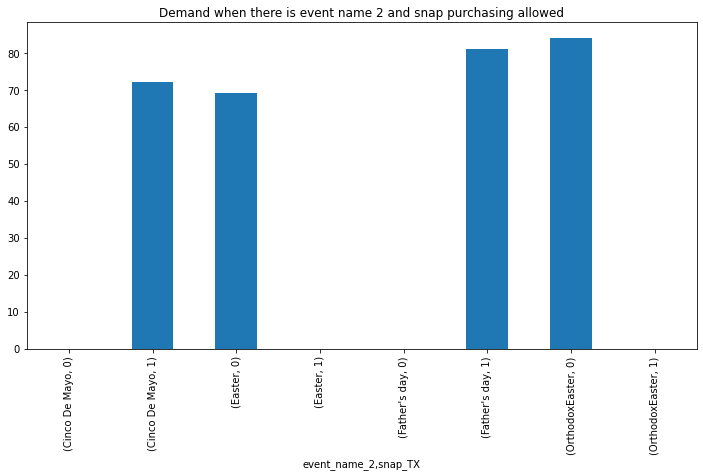

In [150]:
Texas = df.groupby(["event_name_2" ,"snap_TX",])
Texas["demand"].nunique().plot(kind = "bar", figsize=(12,6))
plt.title("Demand when there is event name 2 and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We can definetly see by Cinco De Mayo and father\'s day, if we have event and snap purchasing is allowed then there is high sell.</br>
2. Orthadox Easter has highest sell even without any snap purchasing


## Demand with even_type_1 and snap purchasing in Texas

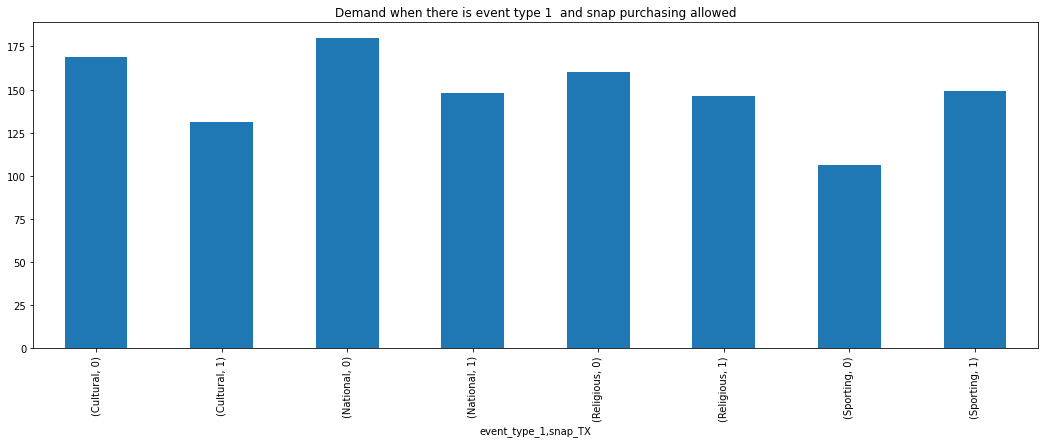

In [151]:
Texas = df.groupby(["event_type_1" ,"snap_TX",])
Texas["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event type 1  and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We can see even the non-snap purchasing days has more demand .



## Demand with even_type_2 and snap purchasing in Texas

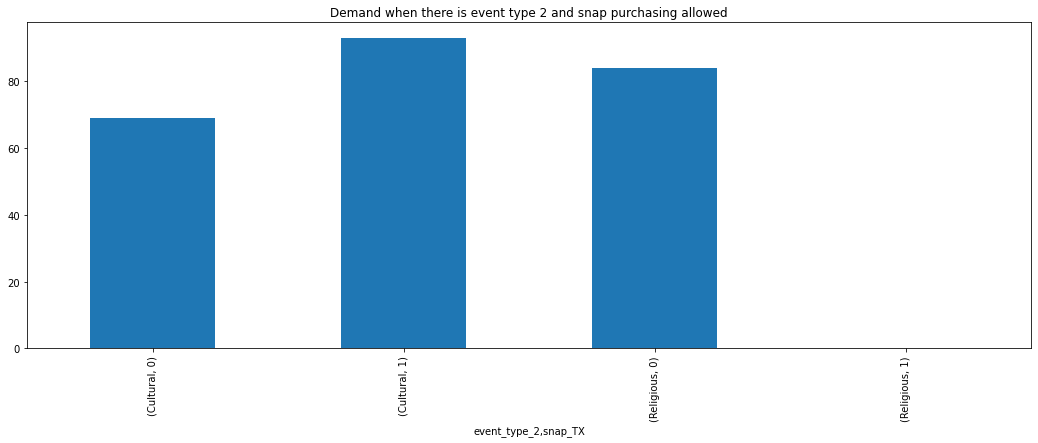

In [152]:
Texas = df.groupby(["event_type_2" ,"snap_TX",])
Texas["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event type 2 and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We have more demand on Cultural Event and snap Purchasing was allowed



## Demand from each store id when Texas had snap purchasing

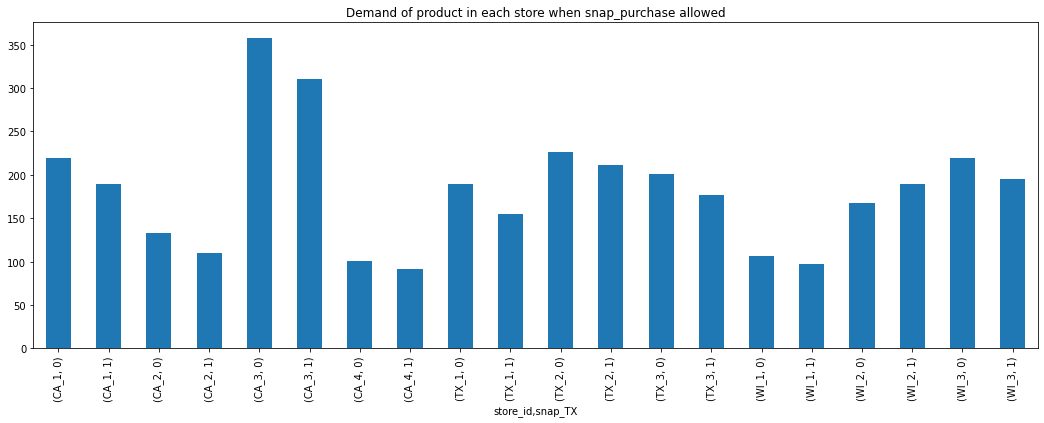

In [172]:
event = df.groupby(["store_id" ,"snap_TX",])
event["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand of product in each store when snap_purchase allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. CA_3 has more demand on snap purchasing and non snap purchasing days.


## Demand with event_name_1 and snap purchasing in California

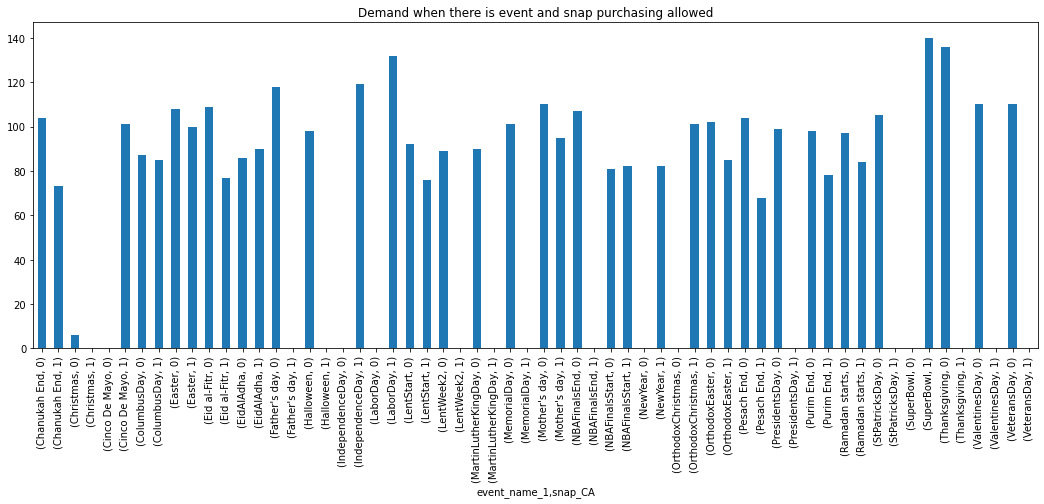

In [153]:
California = df.groupby(['event_name_1', "snap_CA"])
California["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Labour day and Superbowl, have demand on snap purchasing 


## Demand with event_name_2 and snap purchasing in California

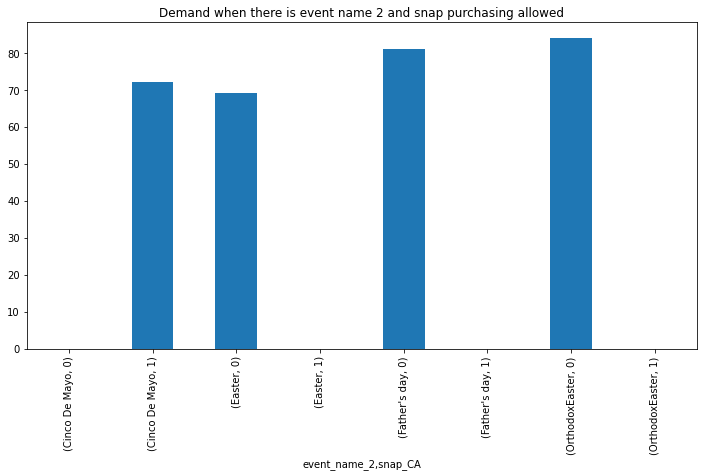

In [154]:
California = df.groupby(["event_name_2" ,"snap_CA",])
California["demand"].nunique().plot(kind = "bar", figsize=(12,6))
plt.title("Demand when there is event name 2 and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We can definetly see by Cinco De Mayo and father\'s day, if we have event and snap purchasing is allowed then there is high sell.</br>
2. Orthadox Easter has highest sell even without any snap purchasing


## Demand with even_type_1 and snap purchasing in California

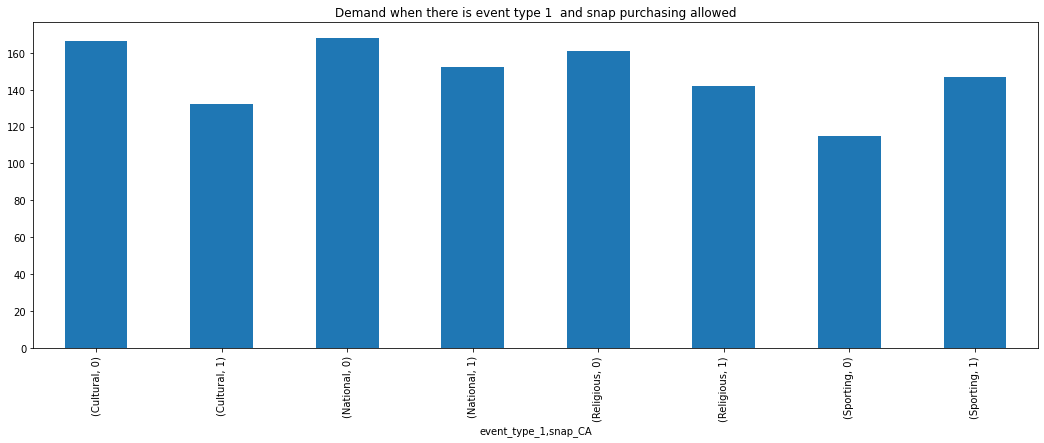

In [155]:
California = df.groupby(["event_type_1" ,"snap_CA",])
California["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event type 1  and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We can see even the non-snap purchasing days has more demand .



## Demand with even_type_2 and snap purchasing in California

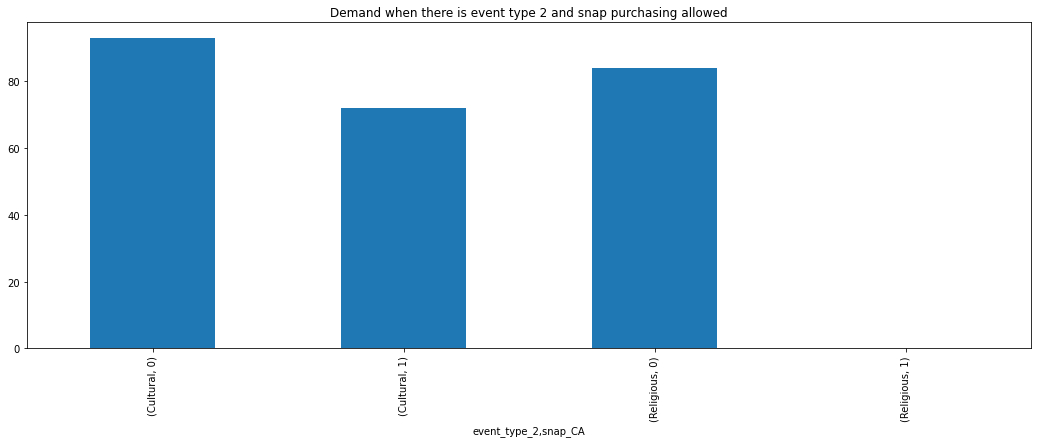

In [156]:
California = df.groupby(["event_type_2" ,"snap_CA",])
California["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event type 2 and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. We have more demand on Cultural Event and snap Purchasing was allowed



## Demand from each store id when California had snap purchasing

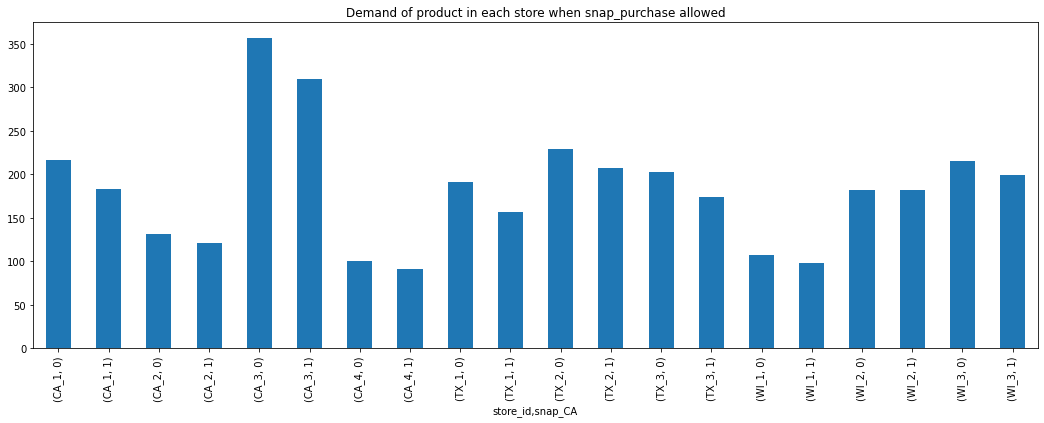

In [173]:
event = df.groupby(["store_id" ,"snap_CA",])
event["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand of product in each store when snap_purchase allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. CA_3 has more demand on snap purchasing and non snap purchasing days.

## Demand with event_name_1 and snap purchasing in Wisconsin

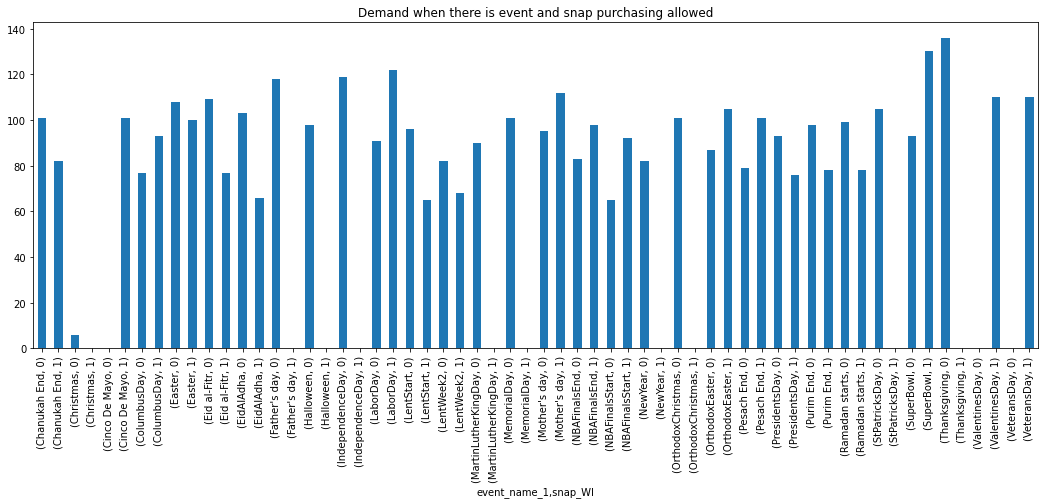

In [157]:
Wisconsin = df.groupby(['event_name_1', "snap_WI"])
Wisconsin["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event and snap purchasing allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Labour day and Superbowl, have demand on snap purchasing 



## Demand with event_name_2 and snap purchasing in Wisconsin

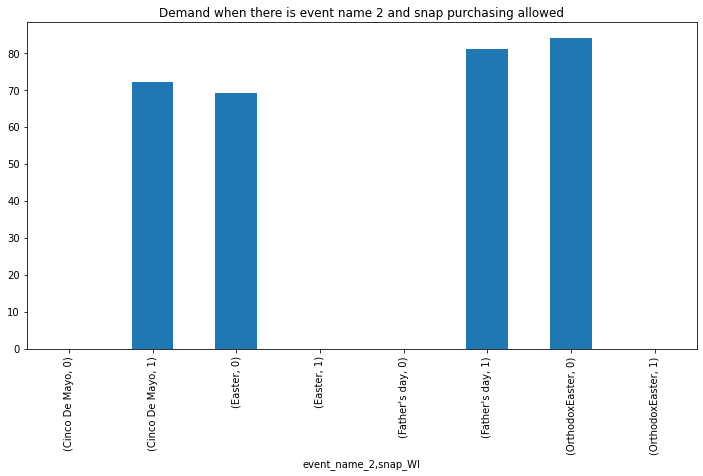

In [158]:
Wisconsin = df.groupby(["event_name_2" ,"snap_WI",])
Wisconsin["demand"].nunique().plot(kind = "bar", figsize=(12,6))
plt.title("Demand when there is event name 2 and snap purchasing allowed")
plt.show()



<b style="color:DodgerBlue;"> Observation </b>
1. We can see even the non-snap purchasing days has more demand .


## Demand with even_type_1 and snap purchasing in Wisconsin

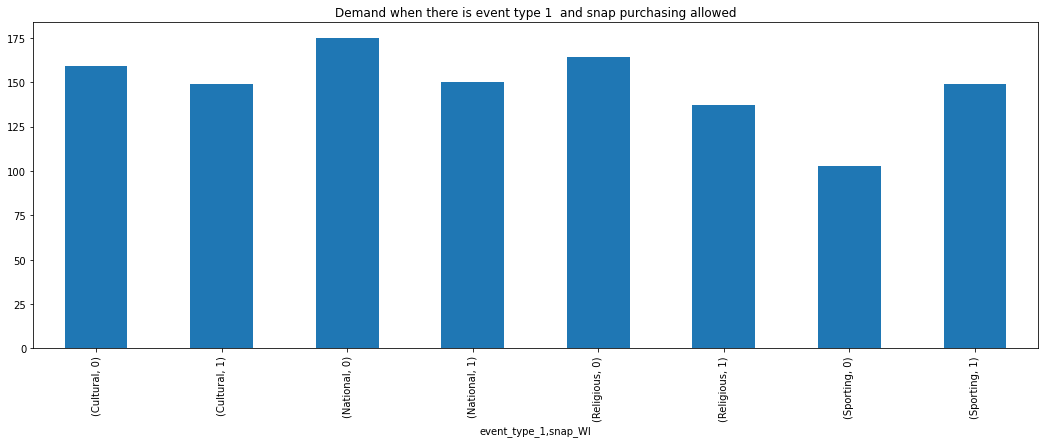

In [159]:
Wisconsin = df.groupby(["event_type_1" ,"snap_WI",])
Wisconsin["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event type 1  and snap purchasing allowed")
plt.show()

## Demand with even_type_2 and snap purchasing in Wisconsin

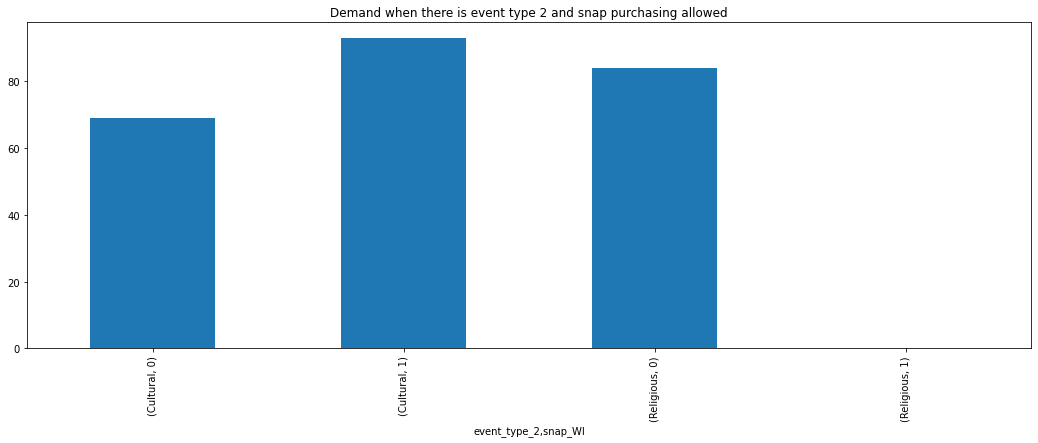

In [160]:
Wisconsin = df.groupby(["event_type_2" ,"snap_WI",])
Wisconsin["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand when there is event type 2 and snap purchasing allowed")
plt.show()


<b style="color:DodgerBlue;"> Observation </b>
1. We have more demand on Cultural Event and snap Purchasing was allowed


## Demand in each store when snap purchasing allowed in Wisconsin

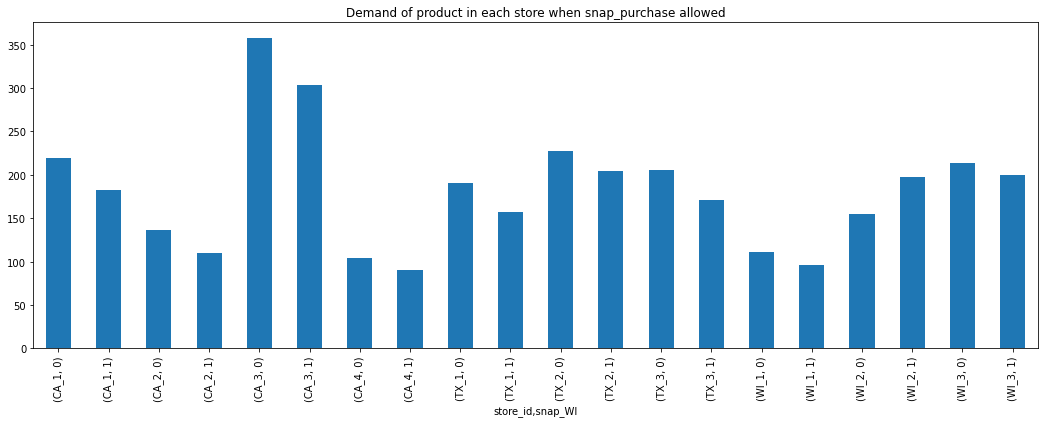

In [174]:
event = df.groupby(["store_id" ,"snap_WI",])
event["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand of product in each store when snap_purchase allowed")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. CA_3 has more demand on snap purchasing and non snap purchasing days.

## Demand per state when there is an event


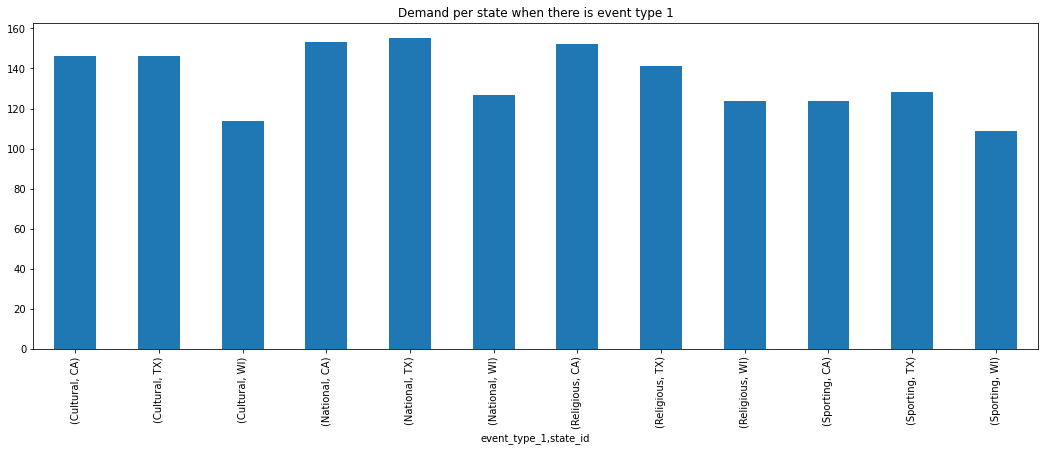

In [163]:
event = df.groupby(["event_type_1" ,"state_id",])
event["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand per state when there is event type 1")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. California and Texas have more demand on National Event
2. California and Texas have also second highest demand on Cultural Event

## Demand per state when event type 2 

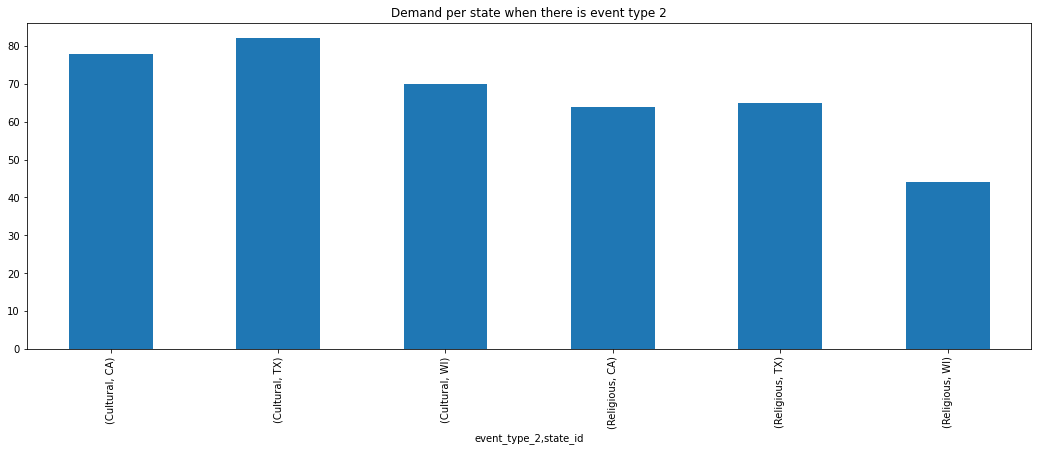

In [165]:
event = df.groupby(["event_type_2" ,"state_id",])
event["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand per state when there is event type 2")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Cultural event has more demand.
2. Texas has more demand on cultural event. </br>
3.California has second highest  demand on cultural event 

##  Demand of product with state

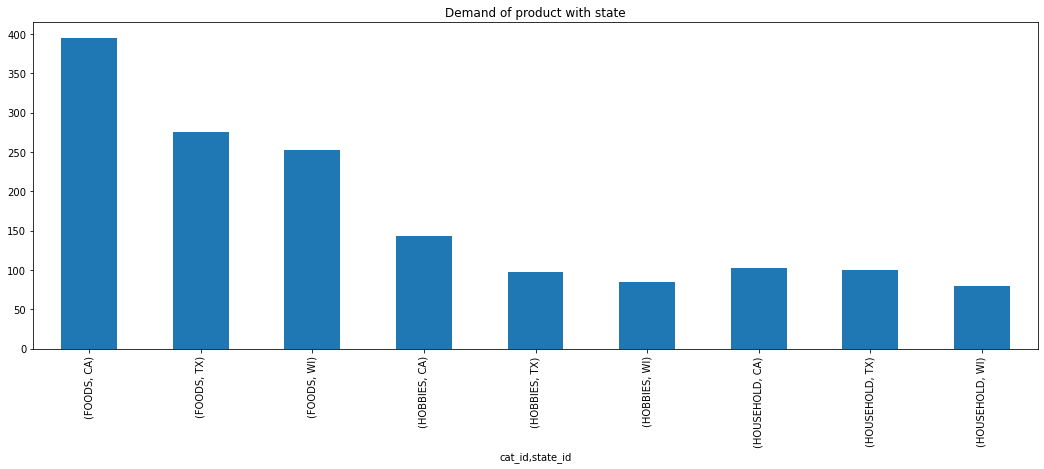

In [167]:
event = df.groupby(["cat_id" ,"state_id",])
event["demand"].nunique().plot(kind = "bar", figsize=(18,6))
plt.title("Demand of product with state")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Food category has more demand. </br>
2. California  has highest demand on food.
3. Texas has second highest demand on food.

## Sell on weekdays and when there is an event type 1

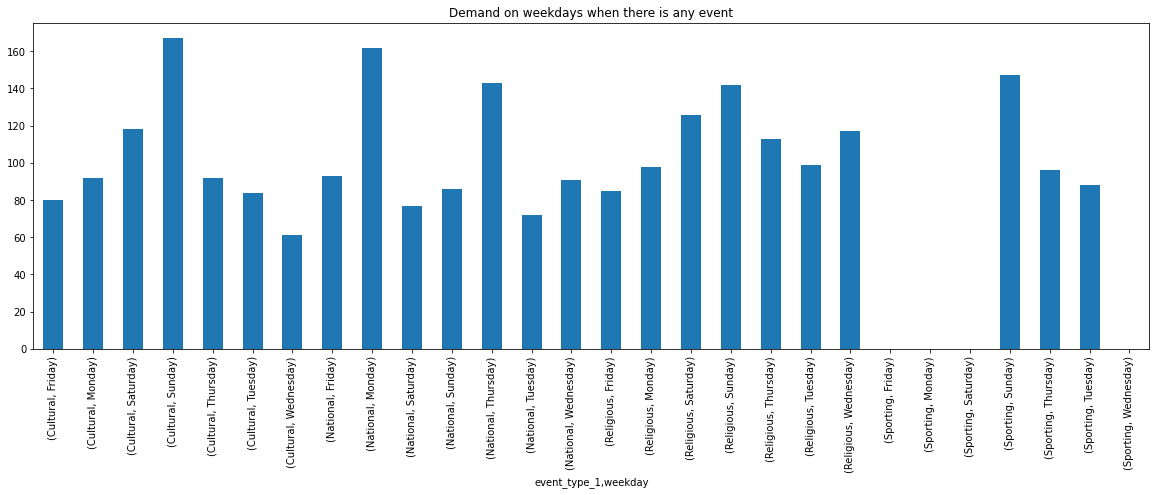

In [210]:
a = df.groupby(["event_type_1" ,"weekday"])
a["demand"].nunique().plot.bar(figsize=(20,6))
plt.title("Demand on weekdays when there is any event")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>        
1.Cultural and Religios Event have more demand on Sunday.</br>     
2.National Event has more demand on Monday and Thrusday.</br>
 

## Demand on weekdays when there is an event type 2

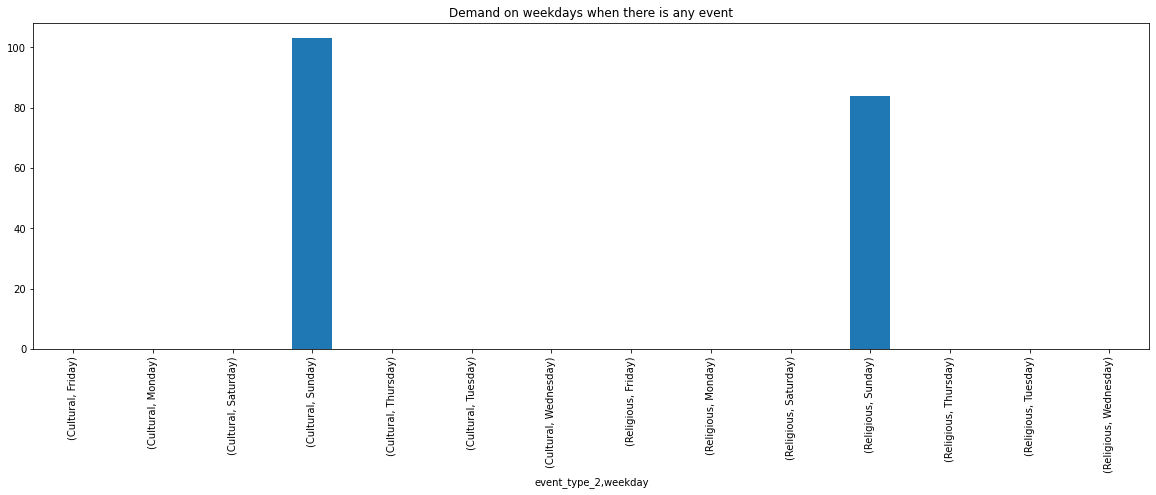

In [209]:

a = df.groupby(["event_type_2" ,"weekday"])
a["demand"].nunique().plot.bar(figsize=(20,6))
plt.title("Demand on weekdays when there is any event")
plt.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Cultural and Religious event has more demand on Sunday

## Demand with Department id when sell price is high or low

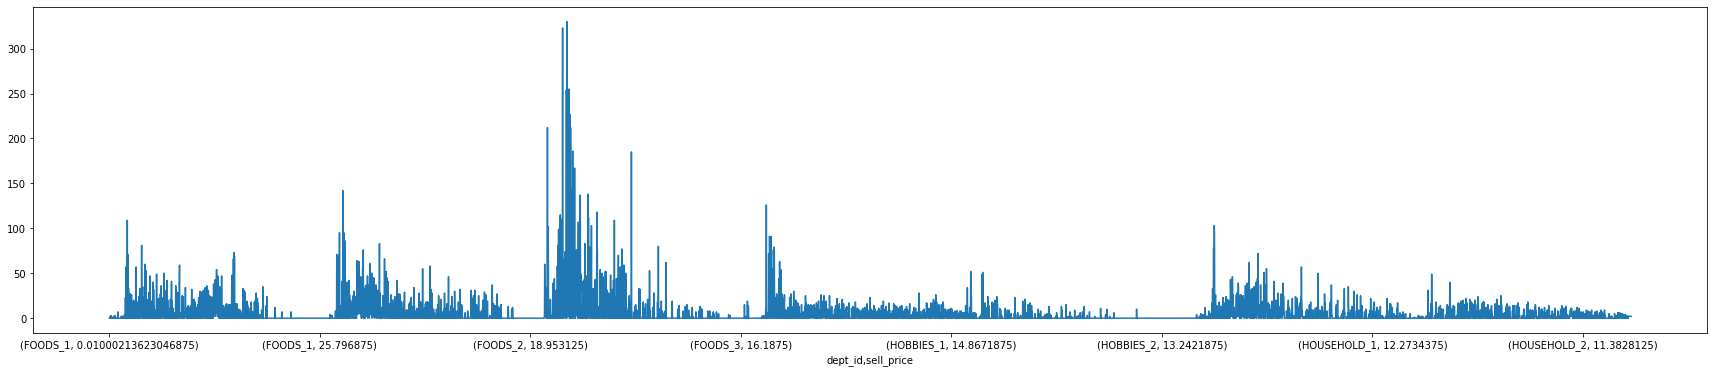

In [217]:
a = df.groupby(["dept_id" ,"sell_price"])
a["demand"].nunique().plot( figsize=(30,6))
plt.show()

In [ ]:

#which store has maximum price sell on which date
dataset_1 = df.groupby(["dept_id" ,"demand", "state_id","store_id","date", ])['sell_price'].max()
dataset_1 = pd.DataFrame(dataset_1.reset_index())
fig = px.line(dataset_1, x = 'dept_id', y='sell_price', color = "dept_id",
              hover_data = [ 'demand', "store_id"])
fig.show()

<b style="color:DodgerBlue;"> Observation </b>
1. Food_2 and price between 18 o 17 has more demand. </br>


In [4]:
# taking data year wise
df_2011 = df[df.year==2011]
df_2012  = df[df.year==2012]
df_2013 = df[df.year==2013]
df_2014 = df[df.year==2014]
df_2015  = df[df.year==2015]
df_2016  = df[df.year==2016]


#What is the size of the data  final data
print(f'df_2011 file has {df_2011.shape[0]} rows and {df_2011.shape[1]} columns.')
print(f'df_2012 file has {df_2012.shape[0]} rows and {df_2012.shape[1]} columns.')
print(f'df_2013 file has {df_2013.shape[0]} rows and {df_2013.shape[1]} columns.')
print(f'df_2014 file has {df_2014.shape[0]} rows and {df_2014.shape[1]} columns.')
print(f'df_2015 file has {df_2015.shape[0]} rows and {df_2015.shape[1]} columns.')
print(f'df_2016 file has {df_2016.shape[0]} rows and {df_2016.shape[1]} columns.')

df_2011 file has 10275130 rows and 24 columns.
df_2012 file has 11159340 rows and 24 columns.
df_2013 file has 11128850 rows and 24 columns.
df_2014 file has 11128850 rows and 24 columns.
df_2015 file has 11128850 rows and 24 columns.
df_2016 file has 4360070 rows and 24 columns.


In [5]:
df_2011 = downcast(df_2011)
df_2012  = downcast(df_2012)
df_2013 = downcast(df_2013)
df_2014 = downcast(df_2014)
df_2015  = downcast(df_2015)
df_2016  = downcast(df_2016)

24it [00:00, 40.07it/s]
24it [00:00, 37.87it/s]
24it [00:00, 40.14it/s]
24it [00:00, 43.10it/s]
24it [00:00, 44.52it/s]
24it [00:00, 115.82it/s]


<H2> Individual year analysis</H2>

In [8]:

def demand_year_wise(dataset_1, Title):

    
    dataset_1 = dataset_1.groupby([ 'date', 'month'])['demand'].sum()
    dataset_1 = pd.DataFrame(dataset_1.reset_index())
    fig = px.line(dataset_1, x = 'date', y='demand', color='month', title = Title)
    
 
    
    fig.show()
    
demand_year_wise(df_2011, "Demand in 2011")


In [9]:
demand_year_wise(df_2012, "Demand in 2012")


In [10]:
demand_year_wise(df_2013, "Demand in 2013")


In [11]:
demand_year_wise(df_2014, "Demand in 2014")


In [12]:
demand_year_wise(df_2015, "Demand in 2015")


In [13]:
demand_year_wise(df_2016, "Demand in 2016")

<b> plotly doesn't render plots after closing the kernel, so adding it as a image </b>
<img src="https://i.imgur.com/JyXikgj.png" alt = "demand in 2011">
<img src="https://i.imgur.com/oTfSPhl.png">
<img src="https://i.imgur.com/Z7gqIwA.png">
<img src="https://i.imgur.com/BxGCBmn.png">
<img src="https://i.imgur.com/QlAvtdc.png">
<img src="https://i.imgur.com/LyGfygC.png">

<H3 style="color:Red;"> Observation </H3>

1. There is no or very less on christmas in every year.
2. There is seasonality in our data. Every year it repeats .


<H2> Demand on Weekend </H2>

In [28]:
df_2011 = df[df.year==2011]
# df_2012  = df[df.year==2012]
# df_2013 = df[df.year==2013]
# df_2014 = df[df.year==2014]
# df_2015  = df[df.year==2015]
# df_2016  = df[df.year==2016]

df_2011 = downcast(df_2011)
# df_2012  = downcast(df_2012)
# df_2013 = downcast(df_2013)
# df_2014 = downcast(df_2014)
# df_2015  = downcast(df_2015)
# df_2016  = downcast(df_2016)

27it [00:01, 13.77it/s]


## demand when snap purchase allowed and has an event on weekend and weekdays

In [33]:
def demand_year_snap__days(dataset, year):
    dataset_weekend_event_snap_allowed = dataset [ (dataset[ 'weekday'] == "Sunday") | (df_2016[ 'weekday'] == "Sunday") | (dataset['snap_TX'] == 1)
                              | (dataset['snap_WI'] == 1) | (dataset['snap_CA'] == 1)]
    dataset_weekday = dataset [ (dataset[ 'weekday'] != "Sunday") | (df_2016[ 'weekday'] != "Sunday") | (dataset['snap_TX'] != 1)
                              | (dataset['snap_WI'] != 1) | (dataset['snap_CA'] != 1)]
    
    print(f" demand in {year} when event was on weekend and snap purchasing was allowed \n{dataset_weekend_event_snap_allowed.demand.describe().apply(lambda x: format(x, 'f'))}" )
    print("***" *20)
    print(f" demand in {year} on weekdays \n{dataset_weekday.demand.describe().apply(lambda x: format(x, 'f'))}" )
    
  

In [39]:
demand_year_snap__days(df_2011, 2011)   

 demand in 2011 when event was on weekend and snap purchasing was allowed 
count    5793100.000000
mean           0.913046
std            3.867120
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max          634.000000
Name: demand, dtype: object
************************************************************
 demand in 2011 on weekdays 
count    10061700.000000
mean            0.856844
std             3.675353
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max           693.000000
Name: demand, dtype: object


In [35]:
demand_year_snap__days(df_2012, 2012) 

 demand in 2012 when event was on weekend and snap purchasing was allowed 
count    6280940.000000
mean           1.158031
std            4.458339
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max          498.000000
Name: demand, dtype: object
************************************************************
 demand in 2012 on weekdays 
count    10976400.000000
mean            1.075411
std             4.183434
min             0.000000
25%             0.000000
50%             0.000000
75%             1.000000
max           648.000000
Name: demand, dtype: object


In [34]:
demand_year_snap__days(df_2013, 2013) 

 demand in 2013 when event was on weekend and snap purchasing was allowed 
count    6280940.000000
mean           1.258419
std            4.457750
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max          763.000000
Name: demand, dtype: object
************************************************************
 demand in 2013 on weekdays 
count    10915420.000000
mean            1.173782
std             4.201005
min             0.000000
25%             0.000000
50%             0.000000
75%             1.000000
max           763.000000
Name: demand, dtype: object


In [36]:
demand_year_snap__days(df_2014, 2014) 

 demand in 2014 when event was on weekend and snap purchasing was allowed 
count    6311430.000000
mean           1.257649
std            3.944645
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max          567.000000
Name: demand, dtype: object
************************************************************
 demand in 2014 on weekdays 
count    10884930.000000
mean            1.167551
std             3.658522
min             0.000000
25%             0.000000
50%             0.000000
75%             1.000000
max           606.000000
Name: demand, dtype: object


In [37]:
demand_year_snap__days(df_2015, 2015) 

 demand in 2015 when event was on weekend and snap purchasing was allowed 
count    6250450.000000
mean           1.318362
std            3.758913
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max          349.000000
Name: demand, dtype: object
************************************************************
 demand in 2015 on weekdays 
count    10945910.000000
mean            1.235248
std             3.545168
min             0.000000
25%             0.000000
50%             0.000000
75%             1.000000
max           349.000000
Name: demand, dtype: object


In [38]:
demand_year_snap__days(df_2016, 2016) 

 demand in 2016 when event was on weekend and snap purchasing was allowed 
count    2591650.000000
mean           1.437597
std            3.768596
min            0.000000
25%            0.000000
50%            0.000000
75%            2.000000
max          248.000000
Name: demand, dtype: object
************************************************************
 demand in 2016 on weekdays 
count    4268600.000000
mean           1.364482
std            3.586056
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max          248.000000
Name: demand, dtype: object


<H1 style="color:Red;"> Final Observation </H1>

* CA and TX has more demand on product as compare to WI.</br>     
* We have very few days in a year when snap purchasing is allowed.</br>     
* There is negative trend in demand and sell price.</br>     
* We have higher demand on National and Religious event.</br>     
* We have more product in Food department and less product in Hobbies department. </br>     
* Saturday and Sunday have high demand.</br>     
* Cultural Event and National event have more demand.</br>     
* Snap_purchasing does not make any significant impact.</br>     
* If there is any event, demand is going to be increase certainly.      </br>     
*  There is no or very less sell on christmas in every year.
* There is seasonality in our data. Every year it repeats 

# Data Preperation

In [2]:
sample_sub = pd.read_csv("sample_submission.csv") #sample submission file
sample_sub.head()

id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
0  HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
1  HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
2  HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
3  HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
4  HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   

   F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [4]:
# #load data
calendar = pd.read_csv('calendar.csv')
sell_price = pd.read_csv("sell_prices.csv")
sales_train_eval = pd.read_csv("sales_train_evaluation.csv")


In [6]:
#downcast all the dataframe to avoid memory error
sample_sub = downcast(sample_sub)
sales_train_eval = downcast(sales_train_eval)
sell_price = downcast(sell_price)
calendar = downcast(calendar)

29it [00:00, 204.38it/s]
1947it [01:16, 25.54it/s] 
4it [00:01,  3.72it/s]
14it [00:00, 1146.97it/s]


In [7]:
"""
1. Add new categories as no event  in event_name_1, event_name_2, event_type_1, event_type_2
2. fill the null values to no event
Note:  we are filling the null values before spltting to avoid memory error and 
"""

calendar["event_name_1"] = calendar["event_name_1"].cat.add_categories("no_event")
calendar["event_name_1"] = calendar['event_name_1'].fillna("no_event")

calendar["event_name_2"] = calendar["event_name_2"].cat.add_categories("no_event")
calendar["event_name_2"] = calendar['event_name_2'].fillna("no_event")

calendar["event_type_2"] = calendar["event_type_2"].cat.add_categories("no_event")
calendar["event_type_2"] = calendar['event_type_2'].fillna("no_event")

calendar["event_type_1"] = calendar["event_type_1"].cat.add_categories("no_event")
calendar["event_type_1"] = calendar['event_type_1'].fillna("no_event")

In [8]:
#melt sales_train_eval data 
sales_train_eval = pd.melt(sales_train_eval, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')

#downacast the dataframe
sales_train_eval = downcast(sales_train_eval)
    
"""we have 60K datapoints in sample submission with 30k from evaluation and 30k from validation
1. submission_rows_eval = get all the id which has evaluation in the end
2. submission_rows_val = get all the id which has validation in the end
"""
submission_rows_eval = [row for row in sample_sub['id'] if 'evaluation' in row] #get all the evaluation rows
submission_rows_val = [row for row in sample_sub['id'] if 'validation' in row]#get all the validation rows 


#get all evaluation from submission data
submission_eval = sample_sub[sample_sub['id'].isin(submission_rows_eval)]

#get all valdation from submission data
submission_val = sample_sub[sample_sub['id'].isin(submission_rows_val)]


"""split the data in eval and val part with by days. 
submission_eval will start from d_1914 and end on d_1941
submission_val will start from d_1942 and end on d_1969

"""
submission_eval.columns = ['id', 'd_1914', 'd_1915', 'd_1916', 'd_1917', 'd_1918', 'd_1919', 'd_1920', 'd_1921', 'd_1922', 'd_1923', 'd_1924', 'd_1925', 'd_1926', 'd_1927', 'd_1928', 'd_1929', 'd_1930', 'd_1931', 
                      'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941']

submission_val.columns = ['id', 'd_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947', 'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 
'd_1953', 'd_1954', 'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 
                      'd_1960', 'd_1961', 'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']


#dropping duplicates if any
drop_duplicate_product = sales_train_eval[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].drop_duplicates()
submission_val['id'] = submission_val['id'].replace("_validation" , "_evaluation")

#merge validation and evaluation data on id
submission_val = submission_val.merge(drop_duplicate_product, how = 'left', on = 'id')
submission_eval = submission_eval.merge(drop_duplicate_product, how = 'left', on = 'id')
submission_val['id'] = submission_val['id'].replace( "_evaluation", "_validation" )

submission_val = pd.melt(submission_val, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                         var_name = 'day', value_name = 'demand')

submission_eval = pd.melt(submission_eval, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                         var_name = 'day', value_name = 'demand')

#create one new columns as part which has our train, test1 and test2
sales_train_eval['part'] = 'train'
submission_eval['part'] = 'test1'
submission_val['part'] = 'test2'

data = pd.concat([sales_train_eval, submission_val, submission_eval], axis = 0)

data = downcast(data)


8it [00:04,  1.89it/s]
9it [00:22,  2.45s/it]


In [9]:
#drop 'weekday', 'wday', 'month', 'year' from calendar
calendar.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)
data = data[data['part'] != 'test2']
data

id        item_id    dept_id   cat_id  \
0       HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1       HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2       HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3       HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4       HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                               ...            ...        ...      ...   
853715    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
853716    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
853717    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
853718    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
853719    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

       store_id state_id     day  demand   part  
0          CA_1       CA     d_1       0  train  
1          CA_1       CA     d_1       0  train  
2          CA_1       CA     d_1       0  train  
3          CA_1       CA     d_1       0  train  
4          CA_1       CA     d_1       0  train  
...         ...      ...     ...     ...    ...  
853715     WI_3       WI  d_1941       0  test1  
853716     WI_3       WI  d_1941       0  test1  
853717     WI_3       WI  d_1941       0  test1  
853718     WI_3       WI  d_1941       0  test1  
853719     WI_3       WI  d_1941       0  test1  

[60034810 rows x 9 columns]

In [12]:
#merge data with calendar 
data = pd.merge(data, calendar, how = 'left',left_on = ['day'], right_on = ['d'])
data.drop(['d', 'day'], inplace = True, axis = 1)
data

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
60034805    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
60034806    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
60034807    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
60034808    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
60034809    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id  demand   part       date  wm_yr_wk event_name_1  \
0            CA_1       CA       0  train 2011-01-29     11101     no_event   
1            CA_1       CA       0  train 2011-01-29     11101     no_event   
2            CA_1       CA       0  train 2011-01-29     11101     no_event   
3            CA_1       CA       0  train 2011-01-29     11101     no_event   
4            CA_1       CA       0  train 2011-01-29     11101     no_event   
...           ...      ...     ...    ...        ...       ...          ...   
60034805     WI_3       WI       0  test1 2016-05-22     11617     no_event   
60034806     WI_3       WI       0  test1 2016-05-22     11617     no_event   
60034807     WI_3       WI       0  test1 2016-05-22     11617     no_event   
60034808     WI_3       WI       0  test1 2016-05-22     11617     no_event   
60034809     WI_3       WI       0  test1 2016-05-22     11617     no_event   

         event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0            no_event     no_event     no_event        0        0        0  
1            no_event     no_event     no_event        0        0        0  
2            no_event     no_event     no_event        0        0        0  
3            no_event     no_event     no_event        0        0        0  
4            no_event     no_event     no_event        0        0        0  
...               ...          ...          ...      ...      ...      ...  
60034805     no_event     no_event     no_event        0        0        0  
60034806     no_event     no_event     no_event        0        0        0  
60034807     no_event     no_event     no_event        0        0        0  
60034808     no_event     no_event     no_event        0        0        0  
60034809     no_event     no_event     no_event        0        0        0  

[60034810 rows x 17 columns]

In [13]:
#merge data with sell price
data = data.merge(sell_price, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
print(f' dataset  has {data.shape[0]} rows and {data.shape[1]} columns')
data = downcast(data)

0it [00:00, ?it/s]

 dataset  has 60034810 rows and 18 columns


18it [00:02,  6.24it/s]


<H1> Feature Enginerring </H2>

In [14]:
""" 
Label Encode of all categorical values present in dataset

1. For 'event_name_1', 'event_type_1', 'event_name_2' and  'event_type_2' will check null values and fill no_event and then label encode
2. For state_id, store_id, cat_id, dept_id, item_id will direclty label encode


"""
from sklearn.preprocessing import LabelEncoder
def label_encoding(train, feature):
    nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    if feature in nan_features:
        data[feature].fillna("no_event", inplace=True)
        
    encoder = LabelEncoder()
    encoder.fit(train[feature].values.astype(str))
    train[feature] = encoder.fit_transform(data[feature].values.astype(str))
    
    return train[feature]

In [15]:
data['item_id']  = label_encoding(data,"item_id" )
data['dept_id']  = label_encoding(data,"dept_id" )
data['cat_id'] = label_encoding(data,"cat_id" )
data['store_id']  = label_encoding(data,"store_id" )
data['state_id']  = label_encoding(data,"state_id" )
data['event_name_1']  = label_encoding(data,"event_name_1" )
data['event_name_2']  = label_encoding(data,"event_name_2" )
data['event_type_1']  = label_encoding(data,"event_type_1" )
data['event_type_2']  = label_encoding(data,"event_type_2" )


In [16]:
#changeing in date dataframe
data['date'] = pd.to_datetime(data['date'])
data['year']=data['date'].dt.year 
data['month']=data['date'].dt.month 
data['day']=data['date'].dt.day
data['week']=data['date'].dt.week

In [17]:
data.to_pickle("data.pkl")  #save all the data

# Load Data

In [2]:
data = pd.read_pickle("data.pkl")
data.head()

id  item_id  dept_id  cat_id  store_id  \
0  HOBBIES_1_001_CA_1_evaluation     1437        3       1         0   
1  HOBBIES_1_002_CA_1_evaluation     1438        3       1         0   
2  HOBBIES_1_003_CA_1_evaluation     1439        3       1         0   
3  HOBBIES_1_004_CA_1_evaluation     1440        3       1         0   
4  HOBBIES_1_005_CA_1_evaluation     1441        3       1         0   

   state_id  demand   part       date  wm_yr_wk  ...  event_name_2  \
0         0       0  train 2011-01-29     11101  ...             4   
1         0       0  train 2011-01-29     11101  ...             4   
2         0       0  train 2011-01-29     11101  ...             4   
3         0       0  train 2011-01-29     11101  ...             4   
4         0       0  train 2011-01-29     11101  ...             4   

   event_type_2  snap_CA  snap_TX  snap_WI  sell_price  year  month  day  week  
0             2        0        0        0         NaN  2011      1   29     4  
1             2        0        0        0         NaN  2011      1   29     4  
2             2        0        0        0         NaN  2011      1   29     4  
3             2        0        0        0         NaN  2011      1   29     4  
4             2        0        0        0         NaN  2011      1   29     4  

[5 rows x 22 columns]

In [3]:
sample_sub = pd.read_csv("sample_submission.csv")

#### lag feature: 
3 days shift from 28 day to 30 days. <br>
Here we will create 3 new features lag_28, lag_29 and lag_30 which will be shift by days 28, 29 and 30 respectively<br>


In [4]:
#adding rollog features
from tqdm import tqdm
#https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/134777
for i in tqdm(range(28, 31)):
    index_name = "lag_"+str(i)
    data[index_name] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(i))

100%|██████████| 3/3 [01:50<00:00, 36.85s/it]


#### Rolling

taking group of n (here 7 days) and take the avg of it.

In [8]:
data['rolling_mean_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).mean())
data['rolling_std_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).std())

data = downcast(data)

28it [00:16,  1.68it/s]


In [9]:
#fill the missing values with interpolate
data['sell_price_inter'] = data['sell_price'].interpolate(method='linear', inplace=True)

#we left with 7 missing values after filling with interpolate, so fill with 0
data['sell_price'] = data['sell_price'].fillna(0) 

#filling all the nan values to zero
data['rolling_mean_t7'] = data['rolling_mean_t7'].fillna(0) 
data['rolling_std_t7'] = data['rolling_std_t7'].fillna(0) 
data['lag_28'] = data['lag_28'].fillna(0) 
data['lag_29'] = data['lag_29'].fillna(0) 
data['lag_30'] = data['lag_30'].fillna(0) 
data = downcast(data)

28it [00:15,  1.75it/s]


In [11]:
#checking null values

def missing_values(df):
    missing_count = df.isnull().sum()
    percent_missing = missing_count * 100 / len(df)
    values_available = len(df) - missing_count

    missing_value_df = pd.DataFrame({
        'column_name': df.columns,
        "non_misisng_count": values_available,
        'missing_count': missing_count,
        
        'percent_missing': percent_missing
    })
    missing_value_df.sort_values('percent_missing', inplace=True)

    return missing_value_df


missing_values(data)

column_name  non_misisng_count  missing_count  \
id                              id           60034810              0   
rolling_mean_t7    rolling_mean_t7           60034810              0   
lag_30                      lag_30           60034810              0   
lag_29                      lag_29           60034810              0   
lag_28                      lag_28           60034810              0   
week                          week           60034810              0   
day                            day           60034810              0   
month                        month           60034810              0   
year                          year           60034810              0   
sell_price              sell_price           60034810              0   
snap_WI                    snap_WI           60034810              0   
snap_TX                    snap_TX           60034810              0   
snap_CA                    snap_CA           60034810              0   
event_type_2          event_type_2           60034810              0   
event_name_2          event_name_2           60034810              0   
event_type_1          event_type_1           60034810              0   
event_name_1          event_name_1           60034810              0   
wm_yr_wk                  wm_yr_wk           60034810              0   
date                          date           60034810              0   
part                          part           60034810              0   
demand                      demand           60034810              0   
state_id                  state_id           60034810              0   
store_id                  store_id           60034810              0   
cat_id                      cat_id           60034810              0   
dept_id                    dept_id           60034810              0   
item_id                    item_id           60034810              0   
rolling_std_t7      rolling_std_t7           60034810              0   
sell_price_inter  sell_price_inter                  0       60034810   

                  percent_missing  
id                            0.0  
rolling_mean_t7               0.0  
lag_30                        0.0  
lag_29                        0.0  
lag_28                        0.0  
week                          0.0  
day                           0.0  
month                         0.0  
year                          0.0  
sell_price                    0.0  
snap_WI                       0.0  
snap_TX                       0.0  
snap_CA                       0.0  
event_type_2                  0.0  
event_name_2                  0.0  
event_type_1                  0.0  
event_name_1                  0.0  
wm_yr_wk                      0.0  
date                          0.0  
part                          0.0  
demand                        0.0  
state_id                      0.0  
store_id                      0.0  
cat_id                        0.0  
dept_id                       0.0  
item_id                       0.0  
rolling_std_t7                0.0  
sell_price_inter            100.0

In [12]:
#split data time wise
x_train = data[data['date'] <= '2016-03-27']
y_train = x_train['demand']
x_val = data[(data['date'] <= '2016-04-24') & (data['date'] > '2016-03-27')]
y_val = x_val['demand']
test = data[data['date'] > '2016-04-24']

In [13]:
col = [ 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
       'wm_yr_wk', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI',
       'sell_price', 'lag_28', 'lag_29', 'lag_30', 'rolling_mean_t7',
       'rolling_std_t7', 'year', 'month', 'day', 'week']

# Model -1 -Light GBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75}

train_set = lgb.Dataset(x_train[col], y_train)
val_set = lgb.Dataset(x_val[col], y_val)

In [24]:
model = lgb.train(params, train_set, num_boost_round = 2500, early_stopping_rounds =200, valid_sets = [train_set, val_set], verbose_eval = 100)
val_pred = model.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f' rmse score is {val_score}')
y_pred = model.predict(test[col])
test['demand'] = y_pred


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 5.318051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1700
[LightGBM] [Info] Number of data points in the train set: 57473650, number of used features: 23
[LightGBM] [Info] Start training from score 1.122458
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 2.46608	valid_1's rmse: 2.28935
[200]	training's rmse: 2.41984	valid_1's rmse: 2.31824
Early stopping, best iteration is:
[60]	training's rmse: 2.49988	valid_1's rmse: 2.2813
 rmse score is 5.204316944117257


In [25]:
predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.866731  0.691625  0.549294  0.516352   
1  HOBBIES_1_002_CA_1_evaluation  0.474192  0.474192  0.462583  0.417932   
2  HOBBIES_1_003_CA_1_evaluation  0.500992  0.470716  0.482325  0.512601   
3  HOBBIES_1_004_CA_1_evaluation  2.387544  2.040123  1.797237  1.649948   
4  HOBBIES_1_005_CA_1_evaluation  1.093541  0.887497  1.168761  1.601959   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.476673  0.613061  0.924286  0.889703  1.102997  ...  0.847543  1.250974   
1  0.384453  0.357331  0.357331  0.320699  0.277132  ...  0.270198  0.332308   
2  0.473532  0.484464  0.533440  0.539595  0.499525  ...  0.762564  0.768874   
3  2.009645  1.286213  1.407418  1.651772  1.789729  ...  1.533549  1.227199   
4  1.460028  1.264221  1.583555  1.506963  1.737813  ...  1.234848  1.102608   

        F21       F22       F23       F24       F25       F26       F27  \
0  1.005918  0.901906  0.829862  0.866443  1.214537  1.191207  0.857862   
1  0.404311  0.409931  0.459479  0.492428  0.480818  0.466092  0.424257   
2  0.827675  0.813831  0.850298  0.780856  0.802143  0.922996  0.886806   
3  1.203265  1.553797  1.462958  1.164548  1.346732  1.454788  2.066186   
4  0.934316  0.841865  0.833898  0.754966  0.714656  0.858579  0.987663   

        F28  
0  0.915506  
1  0.357331  
2  0.738021  
3  2.283265  
4  1.214299  

[5 rows x 29 columns]

In [26]:
final.to_csv('submission.csv', index = False)

In [27]:
!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "lightgbm-1"

100%|██████████████████████████████████████| 20.4M/20.4M [00:01<00:00, 12.0MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src='https://i.imgur.com/EvzehYr.png'>

# light GbM hyper tunning

In [11]:
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMRegressor
hyperparameters = {
'boosting_type': ['gbdt'],
'metric': ['rmse'],
'objective': ['regression'],
'n_jobs': [-1],
'seed':[ 236],
'learning_rate': [0.1, 0.2, 0.3],
'bagging_fraction': [0.75],
'bagging_freq': [10, 5], 
'colsample_bytree':[ 0.75]}

clf = LGBMRegressor()
gsearch = GridSearchCV(estimator=clf, param_grid=hyperparameters)
gsearch.fit(x_train[col], y_train)
print(gsearch.best_params_, gsearch.best_score_)


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Curre

In [11]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
hyperparameters = {
'boosting_type': ['gbdt'],
'metric': ['rmse'],
'objective': ['regression'],
'n_jobs': [-1],
'seed':[ 236],
'learning_rate': [0.2],
'bagging_fraction': [0.75],
'bagging_freq': [ 5], 
'colsample_bytree':[ 0.75]}

import lightgbm as lgb

# # clf = LGBMRegressor(hyperparameters)
# model = clf.fit(x_train[col], y_train)
train_set = lgb.Dataset(x_train[col], y_train)
val_set = lgb.Dataset(x_val[col], y_val)

model = lgb.train(hyperparameters, train_set, num_boost_round = 2500, early_stopping_rounds =200, valid_sets = [train_set, val_set], verbose_eval = 100)
val_pred = model.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f' rmse score is {val_score}')
y_pred = model.predict(test[col])
test['demand'] = y_pred


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 4.385325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1700
[LightGBM] [Info] Number of data points in the train set: 57473650, number of used features: 23
[LightGBM] [Info] Start training from score 1.122458
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 2.42718	valid_1's rmse: 2.30946
[200]	training's rmse: 2.38217	valid_1's rmse: 2.35073
Early stopping, best iteration is:
[44]	training's rmse: 2.48082	valid_1's rmse: 2.27593
 rmse score is 5.179855518187406


In [12]:

predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.892216  0.648964  0.541736  0.499136   
1  HOBBIES_1_002_CA_1_evaluation  0.533759  0.533759  0.521366  0.455940   
2  HOBBIES_1_003_CA_1_evaluation  0.542841  0.477415  0.489808  0.555234   
3  HOBBIES_1_004_CA_1_evaluation  2.398092  2.114076  1.832743  1.705512   
4  HOBBIES_1_005_CA_1_evaluation  1.167763  0.928069  1.171550  1.627729   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.446502  0.599287  0.963917  0.932590  1.136494  ...  0.878585  1.273115   
1  0.432987  0.406253  0.419053  0.366243  0.317825  ...  0.304757  0.370495   
2  0.495246  0.544175  0.580427  0.585628  0.542739  ...  0.810626  0.830537   
3  2.039744  1.381708  1.458651  1.756863  1.881938  ...  1.560355  1.256201   
4  1.448893  1.296523  1.596973  1.516384  1.747969  ...  1.269351  1.095965   

        F21       F22       F23       F24       F25       F26       F27  \
0  1.020826  0.917594  0.854441  0.901972  1.319471  1.253778  0.858201   
1  0.454842  0.433086  0.492568  0.533759  0.521366  0.503535  0.455940   
2  0.883192  0.788766  0.868899  0.804341  0.861798  0.944021  0.954559   
3  1.189229  1.600850  1.474956  1.184320  1.395317  1.476642  2.110404   
4  0.979797  0.882699  0.899795  0.820937  0.748733  0.909311  0.996618   

        F28  
0  0.959014  
1  0.406253  
2  0.778947  
3  2.377534  
4  1.245975  

[5 rows x 29 columns]

In [13]:
final.to_csv('submission.csv', index = False)

In [14]:
!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "lightgbm with best parameter"

100%|██████████████████████████████████████| 20.4M/20.4M [00:02<00:00, 9.28MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src="https://i.imgur.com/3eWMiW9.png">

# Model -2 XG Boost

In [25]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, learning_rate=0.01, seed = 123)
xgb_model.fit(x_train[col], y_train, verbose = True, eval_metric=mean_squared_error )

[07:44:15] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [26]:
val_pred = xgb_model.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f'Our val rmse score is {val_score}')

Our val rmse score is 13.258448600769043


In [30]:
y_pred = xgb_model.predict(test[col])
test['demand'] = y_pred
predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.502423  0.502423  0.502423  0.502423   
1  HOBBIES_1_002_CA_1_evaluation  0.502423  0.502423  0.502423  0.502423   
2  HOBBIES_1_003_CA_1_evaluation  0.502423  0.502423  0.502423  0.502423   
3  HOBBIES_1_004_CA_1_evaluation  0.502423  0.502423  0.502423  0.502423   
4  HOBBIES_1_005_CA_1_evaluation  0.502423  0.502423  0.502423  0.502423   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.502423  0.502423  0.502423  0.502423  0.502423  ...  0.502423  0.502423   
1  0.502423  0.502423  0.502423  0.502423  0.502423  ...  0.502423  0.502423   
2  0.502423  0.502423  0.502423  0.502423  0.502423  ...  0.502423  0.502423   
3  0.502423  0.502423  0.502423  0.502423  0.502423  ...  0.502423  0.502423   
4  0.502423  0.502423  0.502423  0.502423  0.502423  ...  0.502423  0.502423   

        F21       F22       F23       F24       F25       F26       F27  \
0  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423   
1  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423   
2  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423   
3  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423   
4  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423  0.502423   

        F28  
0  0.502423  
1  0.502423  
2  0.502423  
3  0.502423  
4  0.502423  

[5 rows x 29 columns]

In [31]:
final.to_csv('submission.csv', index = False)

In [32]:

!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "xgboost_with_no_extra_features-2"

100%|██████████████████████████████████████| 20.2M/20.2M [00:02<00:00, 9.32MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src="https://i.imgur.com/ijPQchP.png">

## Xg boost with interpolate sell price

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, learning_rate=0.01, seed = 123)
xgb_model.fit(x_train[col], y_train, verbose = True, eval_metric=mean_squared_error )

val_pred = xgb_model.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f'Our val rmse score is {val_score}')


y_pred = xgb_model.predict(test[col])
test['demand'] = y_pred
predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

[18:02:40] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Our val rmse score is 13.223123550415039
(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.501493  0.501493  0.501493  0.501493   
1  HOBBIES_1_002_CA_1_evaluation  0.501493  0.501493  0.501493  0.501493   
2  HOBBIES_1_003_CA_1_evaluation  0.501493  0.501493  0.501493  0.501493   
3  HOBBIES_1_004_CA_1_evaluation  0.501493  0.501493  0.501493  0.501493   
4  HOBBIES_1_005_CA_1_evaluation  0.501493  0.501493  0.501493  0.501493   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.501493  0.501493  0.501493  0.501493  0.501493  ...  0.501493  0.501493   
1  0.501493  0.501493  0.501493  0.501493  0.501493  ...  0.501493  0.501493   
2  0.501493  0.501493  0.501493  0.501493  0.501493  ...  0.501493  0.501493   
3  0.501493  0.501493  0.501493  0.501493  0.501493  ...  0.501493  0.501493   
4  0.501493  0.501493  0.501493  0.501493  0.501493  ...  0.501493  0.501493   

        F21       F22       F23       F24       F25       F26       F27  \
0  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493   
1  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493   
2  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493   
3  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493   
4  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493  0.501493   

        F28  
0  0.501493  
1  0.501493  
2  0.501493  
3  0.501493  
4  0.501493  

[5 rows x 29 columns]

In [19]:
final.to_csv('submission.csv', index = False)
!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "xgboost_with_sell_price interpolate method"

100%|██████████████████████████████████████| 20.6M/20.6M [00:02<00:00, 10.1MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src="https://i.imgur.com/MyvBwU1.png">

# Model 3 - Adaboost

In [14]:
# col = [ 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
#        'wm_yr_wk', 'event_name_1', 'event_type_1',
#        'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI',
#        'sell_price', 'year', 'month', 'day', 'week']

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train[col], y_train)
val_pred = regr.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f'rmse score is {val_score}')

rmse score is 8.115268548276887


In [15]:
y_pred = regr.predict(test[col])
test['demand'] = y_pred
predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.711637  0.635612  0.635612  0.625639   
1  HOBBIES_1_002_CA_1_evaluation  0.625639  0.625639  0.625639  0.625639   
2  HOBBIES_1_003_CA_1_evaluation  0.645586  0.645586  0.645586  0.645586   
3  HOBBIES_1_004_CA_1_evaluation  1.271363  0.742537  0.742537  0.742537   
4  HOBBIES_1_005_CA_1_evaluation  1.078499  1.078499  1.078499  1.476262   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.625639  0.635612  1.050950  1.212913  1.060924  ...  0.653187  0.742537   
1  0.625639  0.625639  0.625639  0.625639  0.625639  ...  0.625639  0.625639   
2  0.645586  0.645586  0.645586  0.645586  0.645586  ...  0.680736  0.663161   
3  0.742537  0.742537  1.060924  1.638225  1.476262  ...  0.742537  0.742537   
4  1.476262  1.476262  1.885462  1.885462  1.885462  ...  1.476262  1.476262   

        F21       F22       F23       F24       F25       F26       F27  \
0  0.694061  0.694061  0.742537  0.663161  0.742537  0.742537  0.694061   
1  0.625639  0.625639  0.625639  0.625639  0.625639  0.625639  0.625639   
2  0.694061  0.694061  0.694061  0.694061  0.711637  1.109400  1.109400   
3  0.711637  1.109400  0.742537  0.742537  0.742537  0.742537  0.742537   
4  1.476262  1.078499  1.476262  1.078499  1.078499  1.078499  1.078499   

        F28  
0  0.711637  
1  0.625639  
2  0.663161  
3  1.109400  
4  1.078499  

[5 rows x 29 columns]

In [16]:
final.to_csv('submission.csv', index = False)
!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "adaboost"

100%|██████████████████████████████████████| 20.2M/20.2M [00:01<00:00, 10.8MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src="https://i.imgur.com/FpZldYT.png">

# Model 4 - Stacking Classifier

In [25]:
from mlxtend.regressor import StackingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.svm import SVR

In [33]:
X_train1 = x_train[col]
lightgbm = LGBMRegressor()
xgboost = xgb.XGBRegressor(objective ='reg:linear',
                  seed = 123)
adaboost = AdaBoostRegressor(random_state=0, n_estimators=100)


stregr = StackingRegressor(regressors=[xgboost, adaboost],  verbose=1,
                           meta_regressor=lightgbm)

stregr.fit(X_train1, y_train)


Fitting 2 regressors...
Fitting regressor1: xgbregressor (1/2)
[15:45:49] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Fitting regressor2: adaboostregressor (2/2)


StackingRegressor(meta_regressor=LGBMRegressor(),
                  regressors=[XGBRegressor(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='reg:linear',
            

In [34]:
val_pred = stregr.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f'rmse score is {val_score}')

y_pred = stregr.predict(test[col])
test['demand'] = y_pred
predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

rmse score is 5.836832340786545
(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.997281  0.857308  0.701866  0.644614   
1  HOBBIES_1_002_CA_1_evaluation  0.557668  0.609799  0.543312  0.446093   
2  HOBBIES_1_003_CA_1_evaluation  0.604038  0.568409  0.573471  0.569873   
3  HOBBIES_1_004_CA_1_evaluation  2.347068  2.176047  1.965574  1.716206   
4  HOBBIES_1_005_CA_1_evaluation  1.247417  0.994520  1.344363  1.680866   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.545858  0.672189  0.976698  0.758348  0.987874  ...  1.133470  1.453186   
1  0.409749  0.368794  0.266792  0.261198  0.255603  ...  0.407271  0.403202   
2  0.463716  0.573890  0.505423  0.457756  0.458326  ...  0.889656  0.842122   
3  2.076605  1.287876  1.321107  1.698113  1.705914  ...  1.716206  1.372748   
4  1.341567  1.297814  1.636019  1.480663  1.695019  ...  1.377441  1.230505   

        F21       F22       F23       F24       F25       F26       F27  \
0  1.096287  0.983852  0.959403  0.972398  1.387194  1.373117  0.908724   
1  0.543399  0.567230  0.599011  0.590573  0.580472  0.584123  0.533836   
2  0.951352  0.956208  0.966006  0.937699  0.980638  1.033108  0.952740   
3  1.333029  1.770288  1.489929  1.227889  1.512125  1.553436  3.034894   
4  1.054503  1.018141  0.947216  0.840371  0.857891  1.020916  1.117501   

        F28  
0  0.997281  
1  0.434716  
2  0.862169  
3  2.436842  
4  1.351070  

[5 rows x 29 columns]

In [35]:
final.to_csv('submission.csv', index = False)
!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "stacking classifier"

100%|██████████████████████████████████████| 20.4M/20.4M [00:02<00:00, 9.04MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src="https://i.imgur.com/NUpqRy1.png">

# Lightgbm with no extra parameter

In [39]:
col = [ 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
       'wm_yr_wk', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI',
       'sell_price', 'year', 'month', 'day', 'week']

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75}

train_set = lgb.Dataset(x_train[col], y_train)
val_set = lgb.Dataset(x_val[col], y_val)

model = lgb.train(params, train_set, num_boost_round = 3000, early_stopping_rounds =300, valid_sets = [train_set, val_set], verbose_eval = 200)
val_pred = model.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f' rmse score is {val_score}')
y_pred = model.predict(test[col])
test['demand'] = y_pred


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.150310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 57473650, number of used features: 18
[LightGBM] [Info] Start training from score 1.122458
Training until validation scores don't improve for 300 rounds
[200]	training's rmse: 3.05827	valid_1's rmse: 2.91413
[400]	training's rmse: 2.93868	valid_1's rmse: 2.82293
[600]	training's rmse: 2.875	valid_1's rmse: 2.77138
[800]	training's rmse: 2.82498	valid_1's rmse: 2.72208
[1000]	training's rmse: 2.79557	valid_1's rmse: 2.70127
[1200]	training's rmse: 2.76194	valid_1's rmse: 2.6793
[1400]	training's rmse: 2.73493	valid_1's rmse: 2.6531
[1600]	training's rmse: 2.71825	valid_1's rmse: 2.63793
[1800]	training's rmse: 2.69933	valid_1's rmse: 2.62386
[2000]	training's rmse: 2.68343

In [40]:
val_pred = model.predict(x_val[col])
val_score = mean_squared_error(val_pred, y_val)
print(f'rmse score is {val_score}')

y_pred = model.predict(test[col])
test['demand'] = y_pred
predictions = test[['id', 'date', 'demand']]
predictions = predictions.reset_index().pivot_table( index = 'id', columns = 'date', values = 'demand')
columns = ['F' + str(i + 1) for i in range(28)]
predictions.columns = columns
evaluation_rows = [row for row in sample_sub['id'] if 'validation' in row] 
evaluation = sample_sub[sample_sub['id'].isin(evaluation_rows)]

validation = sample_sub[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])
print(final.shape)
final.head()

rmse score is 6.679020651590686
(60980, 29)


id        F1        F2        F3        F4  \
0  HOBBIES_1_001_CA_1_evaluation  0.757751  0.812425  0.808088  0.800299   
1  HOBBIES_1_002_CA_1_evaluation  0.909529  0.964203  0.959866  0.952077   
2  HOBBIES_1_003_CA_1_evaluation  0.839592  0.904347  0.900010  0.892220   
3  HOBBIES_1_004_CA_1_evaluation  1.794925  1.849599  1.845262  1.837472   
4  HOBBIES_1_005_CA_1_evaluation  1.105758  1.153832  1.149495  1.141706   

         F5        F6        F7        F8        F9  ...       F19       F20  \
0  0.713540  0.771310  0.819166  0.749804  0.907100  ...  0.931898  0.706437   
1  0.865318  0.939841  0.961266  0.891084  1.048380  ...  1.073999  0.848317   
2  0.805462  0.868758  0.869431  0.826649  0.961283  ...  0.980701  0.777681   
3  1.750713  1.808483  1.848683  1.778500  1.935796  ...  1.961415  1.735734   
4  1.054947  1.118243  1.158250  1.090669  1.250102  ...  1.269519  1.041701   

        F21       F22       F23       F24       F25       F26       F27  \
0  0.711806  0.697899  0.715701  0.728394  0.747500  0.749449  0.594297   
1  0.853686  0.840600  0.858401  0.872448  0.891554  0.894732  0.739580   
2  0.760388  0.769963  0.787764  0.801811  0.820917  0.824096  0.668943   
3  1.741103  1.728016  1.745818  1.758910  1.778016  1.780128  1.624975   
4  1.049207  1.033984  1.051785  1.067977  1.087083  1.090262  0.935109   

        F28  
0  0.577409  
1  0.729187  
2  0.658550  
3  1.614582  
4  0.924716  

[5 rows x 29 columns]

In [42]:
final.to_csv('submission.csv', index = False)
!kaggle competitions submit -c m5-forecasting-accuracy -f submission.csv -m "lightgbm with no extra features"

100%|██████████████████████████████████████| 20.3M/20.3M [00:11<00:00, 1.86MB/s]
Successfully submitted to M5 Forecasting - Accuracy

<img src="https://i.imgur.com/SrxQ1Yd.png">



In [11]:
from tabulate import tabulate
l = [["lightgbm ", 0.86946,  5.44561],
     ["lightgbm with best parameter", 0.86572,  5.44561],
     ["xgboost", 2.80085,5.44561],
     ["xgboost with no extra features", 2.80085, 5.44561],
     ["xgboost_with_sell_price interpolate method", 3.39226, 5.44561],
      ["xgboost_with_sell_price fill 0 ", 3.36050, 5.44561],
       ["adaboost ", 2.88930, 5.44561],
       ["stacking classifier " ,1.14915 , 5.44561],
       ["lightgbm with no extra features ", 1.64577, 5.44561],
     
     
    ]
table = tabulate(l, headers=["Algorithm", "Private Score", "Public Score"], tablefmt='rst')
print(table)

==========================================  ===============  ==============
Algorithm                                     Private Score    Public Score
==========================================  ===============  ==============
lightgbm                                            0.86946         5.44561
lightgbm with best parameter                        0.86572         5.44561
xgboost                                             2.80085         5.44561
xgboost with no extra features                      2.80085         5.44561
xgboost_with_sell_price interpolate method          3.39226         5.44561
xgboost_with_sell_price fill 0                      3.3605          5.44561
adaboost                                            2.8893          5.44561
stacking classifier                                 1.14915         5.44561
lightgbm with no extra features                     1.64577         5.44561
==========================================  ===============  ==============


<H3> Observation </H3>

LightGBM works well in every cases
